In [1]:
import pickle
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)
from datasist.structdata import detect_outliers
import re

In [2]:
strp={'شقة', 
'فيلا', 
'هاوس',
'تاون',
'توين',
'فى',
'و'
'علي'
'التجمع',
'in',
'فيو',
'م'
'في',
' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '\xa0',
 '²',
 '»',
 'Ã',
 'ã',
 '،',
 '\u061c',
  '؟', '\u200e',
 '\u200f',
 '–',
 '’',
 '“',
 '”',
 '•',
 '⁸',
 '我'}

In [3]:
with open("./vilas_state.pkl",'rb') as file:
        vilas,stack2,link2=pickle.load(file)
df=pd.DataFrame(vilas)
df.rename(columns={'data': 'date'},inplace=True, errors='raise')
df.drop(['vlaues'],axis=1,inplace=True)
df.drop(df.loc[[type(v)!=str for v in df['date']]].index,inplace=True)
df.drop(['Down Payment'],axis=1,inplace=True)
len(vilas)

21737

In [4]:
df

,price,location,date,title,link,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,Compound,Delivery Term,Amenities,Furnished,Delivery Date
0,"7,400,000 EGP",Sheikh Zayed، Giza,9 March 2022,استغل الفرصه وامتلك اخر فيلا في ليك ويست بتسهي...,https://www.olx.com.eg/en/ad/8-IDcHny4.html,54,0.0,[4],[4],[338],"[Stand, Alone, Villa]","[Cash, or, Installment]","[Lake, West]","[Core, &, Shell]",NaN,NaN,NaN
1,"7,700,000 EGP",Rehab City، Cairo,1 March 2022,فيلا للبيع نموذج c بمدينة الرحاب تشطيب كامل,https://www.olx.com.eg/en/ad/c-IDcGhF0.html,291,0.0,[3],[3],[456],"[Stand, Alone, Villa]",[Cash],NaN,[Finished],"[Balcony, Pets, Allowed, Private, Garden, Secu...",[No],"[Ready, to, move]"
2,"4,900,000 EGP",Shorouk City، Cairo,10 January 2022,تاون هاوس245م للبيع بأفضل نظم سداد استلام خلال...,https://www.olx.com.eg/en/ad/245-gcv-IDc4U6j.html,205,0.0,[4],[2],[245],"[Town, House]","[Cash, or, Installment]",[GCR],NaN,"[Balcony, Built, in, Kitchen, Appliances, Maid...",[No],[2022]
3,"6,500,000 EGP","New Cairo - El Tagamoa, Cairo",10 March 2022,توين هاوس 255م للبيع - هايد بارك - التجمع,https://www.olx.com.eg/en/ad/255-IDcqiQS.html,67,0.0,[4],[4],[255],"[Twin, House]",[Cash],"[Hyde, Park, New, Cairo]","[Semi, Finished]","[Private, Garden, Security]",[No],"[Ready, to, move]"
4,"12,000,000 EGP",Sheikh Zayed، Giza,27 February 2022,للبيع فيلا بسعر مميز علي الجولف كمبوند الربوة,https://www.olx.com.eg/en/ad/-IDcG0Qo.html,165,0.0,[4],[3],[800],"[Stand, Alone, Villa]",[Cash],"[Al, Rabwa]",[Finished],"[Balcony, Built, in, Kitchen, Appliances, Cove...",[No],"[Ready, to, move]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21732,"15,380,000 EGP","New Cairo - El Tagamoa, Cairo",23 January 2022,Hyde park chill out in amazing standalone in p...,https://www.olx.com.eg/en/ad/hyde-park-chill-o...,12,0.0,[5],[5],[630],"[Stand, Alone, Villa]",[Cash],"[Hyde, Park, New, Cairo]","[Core, &, Shell]","[Private, Garden, Built, in, Kitchen, Applianc...",[No],"[Ready, to, move]"
21733,"750,000 EGP",New Capital City، Cairo,23 January 2022,فيلا للبيع بالتقسيط استلام فوري في كمبوند البو...,https://www.olx.com.eg/en/ad/-IDcBgOe.html,14,0.0,[3],[3],[250],"[Twin, House]","[Cash, or, Installment]","[IL, Bosco]",NaN,NaN,NaN,"[Ready, to, move]"
21734,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,City villa for sale in west town sodic,https://www.olx.com.eg/en/ad/city-villa-for-sa...,20,0.0,[5],[6],[250],"[Town, House]",NaN,"[Sodic, Westown]",NaN,NaN,NaN,NaN
21735,"5,500,000 EGP","Sheikh Zayed, Giza",23 January 2022,سيتي فيلا للبيع في ويست تاون سوديك,https://www.olx.com.eg/en/ad/-IDcBgNi.html,13,0.0,[5],[6],[250],"[Town, House]",NaN,"[Sodic, Westown]",NaN,NaN,NaN,NaN


***Cleaning***


In [5]:
df['date']=df['date'].apply(lambda x: x.strip())
df['date']=pd.to_datetime(df['date'], format="%d %B %Y")
df['month']= pd.DatetimeIndex(df['date']).month

In [6]:
z=list(df.columns)
x=['price','location','date','title','link','viwers','negotiable','cat','month']
selected=[i for i in z if i not in x ]
selected

['Bedrooms',
 'Bathrooms',
 'Area (m²)',
 'Type',
 'Payment Option',
 'Compound',
 'Delivery Term',
 'Amenities',
 'Furnished',
 'Delivery Date']

In [7]:
for i in selected:
    print(df[i].value_counts())
    print("*"*80)

[4]      8826
[3]      4968
[5]      4224
[6]      1798
[7]       618
[10+]     536
[8]       235
[2]       168
[10]      148
[9]       135
[1]        47
Name: Bedrooms, dtype: int64
********************************************************************************
[4]      7550
[3]      6340
[5]      3637
[6]      1537
[2]      1009
[7]       632
[10+]     410
[8]       240
[1]       153
[9]        98
[10]       97
Name: Bathrooms, dtype: int64
********************************************************************************
[300]       548
[400]       504
[600]       484
[500]       469
[260]       401
           ... 
[1,375]       1
[443]         1
[609]         1
[1,301]       1
[388.78]      1
Name: Area (m²), Length: 1078, dtype: int64
********************************************************************************
[Stand, Alone, Villa]    11528
[Town, House]             5770
[Twin, House]             4405
Name: Type, dtype: int64
****************************************************

In [8]:
def xx (z):
    try:
        return ' '.join(str(e) for e in z)
    except Exception as e:
        
        return np.nan
     
for i in selected:
    df[i]=df[i].apply(xx)

In [9]:
df['Amenities']

0                                                      NaN
1        Balcony Pets Allowed Private Garden Security E...
2        Balcony Built in Kitchen Appliances Maids Room...
3                                  Private Garden Security
4        Balcony Built in Kitchen Appliances Covered Pa...
                               ...                        
21732    Private Garden Built in Kitchen Appliances Bal...
21733                                                  NaN
21734                                                  NaN
21735                                                  NaN
21736    Balcony Covered Parking Maids Room Pets Allowe...
Name: Amenities, Length: 21703, dtype: object

In [10]:
for i in selected:
    print(i)
    print(df[i].unique())
    print("*"*80)

Bedrooms
['4' '3' '5' '6' '10+' '2' '7' '8' '9' '10' '1']
********************************************************************************
Bathrooms
['4' '3' '2' '1' '6' '10+' '5' '7' '8' '9' '10']
********************************************************************************
Area (m²)
['338' '456' '245' ... '288.79' '1,251' '388.78']
********************************************************************************
Type
['Stand Alone Villa' 'Town House' 'Twin House']
********************************************************************************
Payment Option
['Cash or Installment' 'Cash' 'Installment' nan]
********************************************************************************
Compound
['Lake West' nan 'GCR' 'Hyde Park New Cairo' 'Al Rabwa' 'Rehab City'
 'EL Patio Prime' 'Madinaty' 'Village West' 'Beverly Hills' 'Villette'
 'Swan Lake' 'Sun Capital' 'Al Maqsad' 'Zizinia Gardens' 'IL Bosco'
 'EL Patio 5' 'Layan' 'Taj City' 'Al Burouj' 'Uptown Cairo' 'EL Patio 6'
 'The Pearl

In [11]:
df['Delivery Date'].value_counts()

Ready to move      11812
soon                 935
2024                 676
2025                 480
2023                 333
within 6 months      211
2022                 186
2026                 101
2027                   6
Name: Delivery Date, dtype: int64

In [12]:
def date(words):
  chars=[{'ا', 'ل', 'ن'}, {'ر', 'ف', 'و', 'ي'}, {'ا', 'ت', 'س', 'ل', 'م'}]
  x=[{x for x in i if i not in strp}for i in words.split(" ")]
  for i in x:
        if set(chars[2]).issubset(i) and re.search(r'(\d{4})',words):
                  return re.findall(r'(\d{4})',words)[0]
        if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
              return 'Ready to move'

  return np.nan
df.loc[df['Delivery Date'].isnull(),'Delivery Date']=df.loc[df['Delivery Date'].isnull(),'title'].apply(date)

In [13]:
df['Delivery Date']

0                  NaN
1        Ready to move
2                 2022
3        Ready to move
4        Ready to move
             ...      
21732    Ready to move
21733    Ready to move
21734              NaN
21735              NaN
21736              NaN
Name: Delivery Date, Length: 21703, dtype: object

In [14]:
df.loc[df['Delivery Date']=='2027','Delivery Date']='2026'

In [15]:
df.loc[df['Delivery Date'].isin(['1050',                 
'4750'  ,               
'8500' ,                
'١١٢٣' ,                
'1000' ,                
'1500' ,                
'2500' ,                  
'٢٠٢٧' ,                
'7920' ,                
'٢٠٢١']),'Delivery Date']=np.nan

In [16]:
def counter(z,sep):
    from collections import Counter
    sv=[]
    for i in z:
        for i in i.split(sep):
            if i not  in strp:
                sv.append(i)
    return dict(sorted(dict(Counter(sv)).items(), key=lambda item: item[1],reverse=True))

In [17]:
counter(df['title'],' ')

{'للبيع': 10221,
 'في': 6696,
 'كمبوند': 3087,
 'مميز': 2119,
 'بكمبوند': 1935,
 'استلام': 1731,
 'زايد': 1642,
 'التجمع': 1484,
 'بسعر': 1474,
 'sale': 1431,
 'الخامس': 1406,
 'علي': 1390,
 'هيلز': 1377,
 'for': 1375,
 'بالتقسيط': 1310,
 'موقع': 1267,
 'فوري': 1174,
 'بمقدم': 1121,
 'تشطيب': 1108,
 'الشيخ': 1086,
 'مستقلة': 1053,
 'بالم': 1041,
 'Villa': 1008,
 'على': 1004,
 'من': 1000,
 'سنوات': 965,
 'متر': 959,
 'نموذج': 952,
 'بارك': 935,
 'مستقله': 874,
 'و': 851,
 'سعر': 845,
 'م': 795,
 'لوكس': 732,
 'امتلك': 698,
 'جدا': 640,
 'ماونتن': 637,
 'سنين': 629,
 'اكتوبر': 623,
 'For': 620,
 'villa': 615,
 'مقدم': 607,
 'house': 607,
 'فورى': 607,
 'سوبر': 602,
 'جاردن': 594,
 'Sale': 587,
 'كورنر': 561,
 'ميفيدا': 534,
 'Twin': 529,
 'الجديدة': 526,
 'مدينتي': 504,
 'بجوار': 497,
 'هايد': 489,
 '8': 487,
 'فقط': 485,
 'Standalone': 480,
 'view': 468,
 '6': 462,
 'بمدينتي': 450,
 'الشروق': 449,
 'سيتي': 441,
 'لقطه': 434,
 'hills': 432,
 'ع': 428,
 '2': 427,
 'لقطة': 421,
 'بدون': 41

In [18]:
chars=[{'ا','س','ت','ل','م'},{'ش','ا','ط','ب'},{'ق' ,'س','ط'},{'ك','ش','ا'}]
for  i in chars:
    print(i)

{'ل', 'ت', 'م', 'ا', 'س'}
{'ب', 'ط', 'ا', 'ش'}
{'ط', 'ق', 'س'}
{'ا', 'ك', 'ش'}


In [19]:
df['Payment Option'].value_counts()
df['Payment Option'].isnull().sum()

4039

In [20]:
def cash_extractor(words):
  if pd.notnull(words) or pd.notna(words):
    chars=[{'ق' ,'س','ط'},{'م','ق','د'}]
    x=[{x for x in i if i not in strp}for i in words.split(" ")]
    for i in x:
          if set(chars[0]).issubset(i) or set(chars[1]).issubset(i):
                return 'Installment'
    return 'Cash'
  else:
    return np.nan
df.loc[df['Payment Option'].isnull(),'Payment Option']=df.loc[df['Payment Option'].isnull(),'title'].apply(cash_extractor)

In [21]:
def extr(i):      
      if 'نص' in i and 'شطيب' in i or 'متشطب'in i:
        return 'Semi Finished'
      elif 'شطيب' in i or 'متشطب'in i  and ('سوبر' in i or 'فرش' in i or 'مفتاح' in i or 'كامل' in i or  'لوكس'in i or 'الترا'in i or'مميز' in i or'ممتاز' in i or'راقي' in i):
             return 'Finished' 
df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\780014698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Delivery Term'].isnull()]['Delivery Term']=df[df['Delivery Term'].isnull()]['title'].apply(extr)


In [22]:
def x(z):
    if z=='10+':
            return 10
    else:  
        try:
            return int(z)
        except Exception as e:
            print(e)
            return z
    
df['Bathrooms']=df['Bathrooms'].apply(x)
df['Bedrooms']=df['Bedrooms'].apply(x)

In [23]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
df['price']=         df['price'].apply(x)
df['Area (m²)']=     df['Area (m²)'].apply(x)
df['Area (m²)']=     df['Area (m²)'].astype(int)
df['negotiable'] =   df['negotiable'].astype(int)
df['viwers'] =       df['viwers'].astype(int)

In [24]:
def x(z):
    try:
        x=''
        if type(z)==str: 
            for i in z:
                if  i.isdigit():
                    x+=i
            return int(x)
        elif type(z)==list:
            print(z,'list')
            for i in z[0]:
                if i.isdigit():
                    x+=i
            return int(x)
        else:
            return np.nan
    except:
        return np.nan
x('EGP 7,400,000')

7400000

***Fill_Nulls***

In [25]:
for i ,v in df[df['Compound']=='Madinaty']['Amenities'].value_counts().iloc[[2]].items():
    items=i
items

'Balcony Built in Kitchen Appliances Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline Elevator'

In [26]:
# st=set()
# [[st.add(z) for  z in i.split() ]for i in [x for x in  df['Amenities'] if type(x)!=float ]]
# x=list(st)
# sub=['A/C','in','Meter','Private','Central','&','Built','Natural','Allowed', 'Room']
# Amenities={i:0 for  i in x}
# print(len(Amenities.keys()))
# for i in range(26):
#     print(0,',' ,end='')

In [27]:
rows=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
df[rows]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [28]:
# x=set(['Allowed', 'Elevator', 'Parking', 'heating', 'in', 'Private', 'Pets', 'Room', 'Electricity', 'Security', 'Natural', 'Appliances', 'Gas', 'A/C', 'Meter', 'Covered', 'Maids', 'Built', '&', 'Pool', 'Kitchen', 'Central', 'Balcony', 'Water', 'Garden', 'Landline'] ) ^ set(['Allowed','heating','in','Private','Room','Meter','&','Central','&','Appliances'])
# print(x)

In [29]:
# len2=len(df.columns)
# {'&',
#  'Allowed',
#  'Appliances',
#  'Central',
#  'Meter',
#  'Private',
#  'Room',
#  'heating',
#  'in'}
# ['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances']


In [30]:
finall_rows=[i for i in rows if i not in ['Allowed','heating','in','Private','Room','Meter','&','Central','Down Payment','&','Appliances','Built']]
len(['Allowed','heating','in','Private','Room','Meter','&','Central','&','Appliances','Built'])

11

In [31]:
def xvc(z):
    c={'in', 'Appliances', 'heating', 'Private', 'Central', 'Room', 'Allowed', '&', 'Meter'}
    m=['Parking', 'Landline', 'Covered', 'A/C', 'Gas', 'Security', 'Natural', 'Water', 'Elevator', 'Pool','Pets', 'Kitchen', 'Maids', 'Electricity', 'Garden', 'Balcony']
    try:
        if z==np.nan:
            z=pd.Series([np.nan for i in m ])
            return z
        xxx=[]
        if type(z)==str:
            z=set(z.split())
            z= z ^ c
            for i in m:
                if i in z:
                    xxx.append(1)
                else:
                    xxx.append(0)
            return pd.Series(xxx)

        else:
            xxx=[np.nan for i in m ]
            return pd.Series(xxx)
    except Exception as e:
        print(e)
        xxx=[np.nan for i in m ]
        return pd.Series(xxx)   
df[rows]=df['Amenities'].apply(xvc)

In [32]:
df['Furnished'].value_counts()

No     12611
Yes     1235
Name: Furnished, dtype: int64

In [33]:
df['Compound']=df['Compound'].fillna('not_in_Compound')
Compound=df['Compound'].unique().tolist()
st=set()
for i in df[df['Compound'].isnull()]['location']:
    for x in Compound:
        if type(x) != float and x in i:
            st.add(i)
            continue 
st=list(st)

In [34]:
def x(z):
    if z['location']in st and pd.isnull(z['Compound']):
        return z['location'].split('،')[0]
    else:
        return np.nan
df.loc[df['Compound'].isnull(),'Compound']=df.apply(x,axis=1)

In [35]:
df.drop('title',inplace=True,axis=1)
df.drop('link',inplace=True,axis=1)

In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df['Furnished'].value_counts()

No     12611
Yes     1235
Name: Furnished, dtype: int64

In [38]:
['Bedrooms','Bathrooms' ,'Delivery Date']

['Bedrooms', 'Bathrooms', 'Delivery Date']

In [39]:
catoutliers=[]
for i in ['Amenities']:
    for  k ,v in df[i].value_counts().items():
        if v==1:
            catoutliers.append(k)

df.drop(df.loc[df['Amenities'].isin(catoutliers),'Amenities'].index,inplace=True)

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df[['Delivery Date','Delivery Term']] = imputer.fit_transform(df[['Delivery Date','Delivery Term']])


In [41]:
imputer = SimpleImputer(strategy='most_frequent')
df['Furnished'] = imputer.fit_transform(df[['Furnished']])

In [42]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Type                 0
Payment Option       0
Compound             0
Delivery Term        0
Amenities         5888
Furnished            0
Delivery Date        0
month                0
Parking           5888
Landline          5888
Covered           5888
A/C               5888
Gas               5888
Security          5888
Natural           5888
Water             5888
Elevator          5888
Pool              5888
Pets              5888
Kitchen           5888
Maids             5888
Electricity       5888
Garden            5888
Balcony           5888
dtype: int64

<AxesSubplot:xlabel='Area (m²)'>

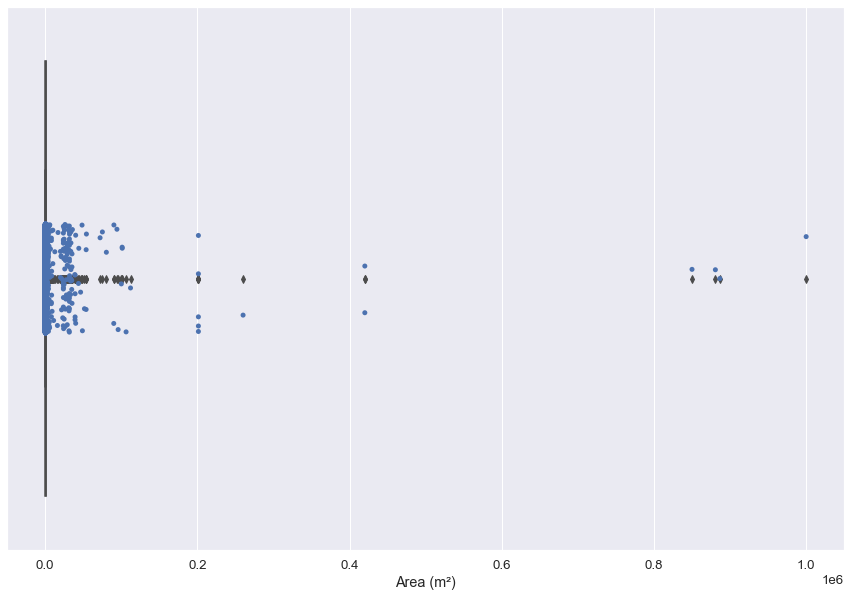

In [43]:
sns.boxplot(x="Area (m²)", data=df)
sns.stripplot(x="Area (m²)", data=df)

In [44]:
for i in ['Bathrooms','Bedrooms']:
    df[i]=df[i].astype(int)

In [45]:
for i in ['Bathrooms','Bedrooms']:
    print(df[i].value_counts())

4     7085
3     5926
5     3396
6     1434
2      907
7      573
10     455
8      215
1      128
9       85
Name: Bathrooms, dtype: int64
4     8282
3     4657
5     3917
6     1670
10     603
7      569
8      207
2      138
9      119
1       42
Name: Bedrooms, dtype: int64


In [46]:
df[df['Bedrooms'].isin([2 ,8 ,1])]

,price,location,date,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,...,Natural,Water,Elevator,Pool,Pets,Kitchen,Maids,Electricity,Garden,Balcony
55,550000,Damanhour، Beheira,2022-03-12,18,0,2,2,90,Twin House,Cash,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
124,9000000,6th of October، Giza,2022-03-12,84,0,2,2,283,Stand Alone Villa,Cash or Installment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,13000000,New Cairo - El Tagamoa، Cairo,2022-03-12,23,0,8,8,600,Stand Alone Villa,Cash,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
300,68000000,"New Cairo - El Tagamoa, Cairo",2022-03-12,113,0,8,8,2200,Stand Alone Villa,Cash,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
301,4500000,New Cairo - El Tagamoa، Cairo,2022-03-12,97,1,8,8,850,Stand Alone Villa,Cash or Installment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21287,12000000,"New Cairo - El Tagamoa, Cairo",2022-01-24,22,0,1,1,550,Stand Alone Villa,Cash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21438,5000000,Nasr City، Cairo,2022-01-24,28,0,1,1,633,Stand Alone Villa,Cash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21454,45000000,New Cairo - El Tagamoa، Cairo,2022-01-23,10,0,8,7,850,Stand Alone Villa,Cash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21534,12500000,Sheikh Zayed، Giza,2022-01-23,22,0,8,9,1200,Stand Alone Villa,Cash,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


clean bussines outliers


In [47]:
# from datasist.structdata import detect_outliers
# idx = ["price",'Area (m²)']
# for col in idx:
#     outliers_indices = detect_outliers(df, 0, [col])
#     col_median = df[col].median()
#     df[col].iloc[outliers_indices] = col_median
# idx = ["price",'Area (m²)','Bathrooms','Bedrooms']
# outliers_indices = detect_outliers(df, 0, idx)
# len(outliers_indices)

In [48]:
idx = ["price",'Area (m²)']
outliers_indices = detect_outliers(df, 0, idx)
df.drop(outliers_indices,inplace=True,axis=0)

In [49]:
len(outliers_indices)

2017

<AxesSubplot:xlabel='price'>

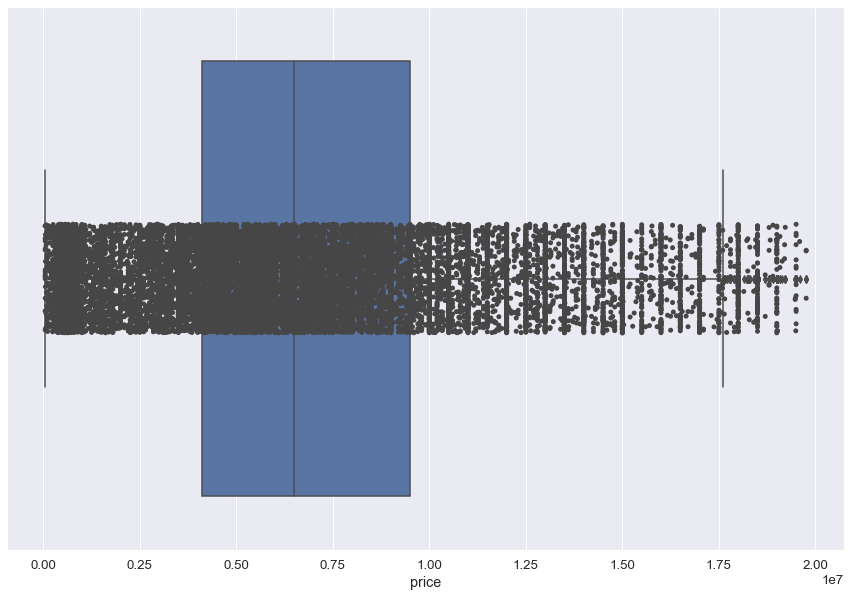

In [50]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

<AxesSubplot:xlabel='Area (m²)', ylabel='price'>

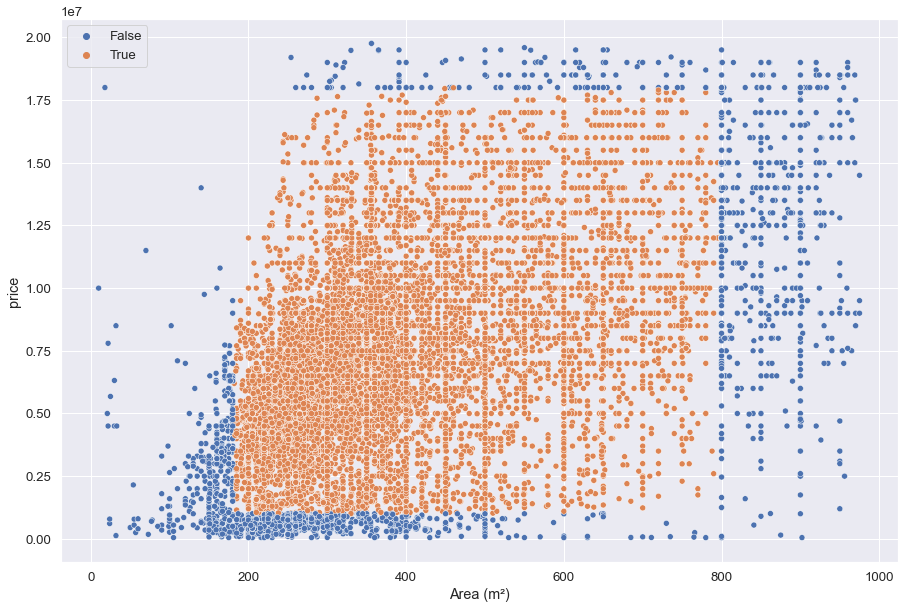

In [51]:
upper=18_000_000
lower=1000_000
flt_p=((df['price']<upper) & (df['price']>lower))
flt_a=(df['Area (m²)']>180) & (df['Area (m²)']<800)
sns.scatterplot(x="Area (m²)",y='price', data=df, hue=flt_a & flt_p)

In [52]:
df.shape

(18187, 32)

In [53]:
df=df[((df['price']<upper) & (df['price']>lower)) & (df['Area (m²)']>200) & (df['Area (m²)']<800)]

In [55]:
df.shape

(14812, 32)

In [56]:
outliers_indices = detect_outliers(df, 0, idx)
len(outliers_indices)

458

<AxesSubplot:xlabel='price'>

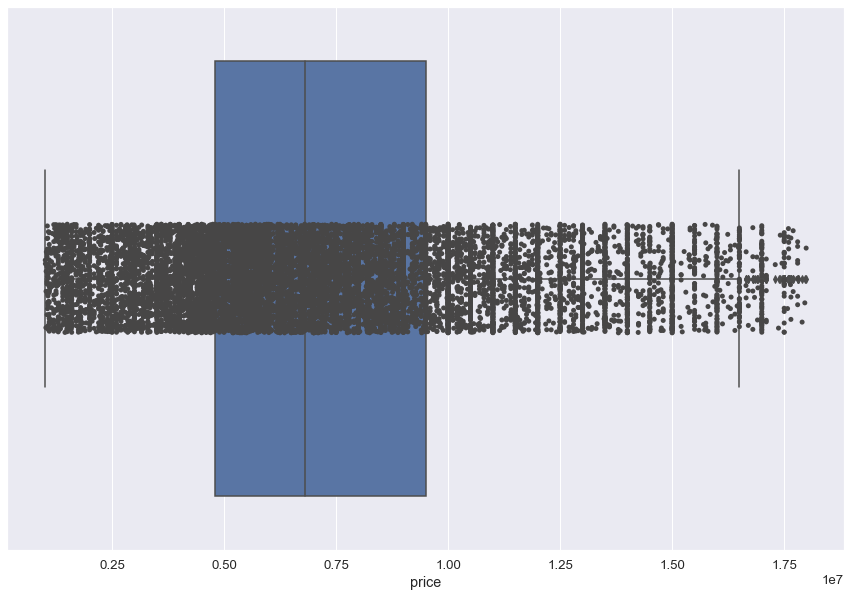

In [57]:
sns.boxplot(x="price", data=df)
sns.stripplot(x="price", data=df, color="#474646")

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
# df.drop('Amenities',inplace=True,axis=1)

>> what is the most common type of villas

<AxesSubplot:xlabel='Type', ylabel='count'>

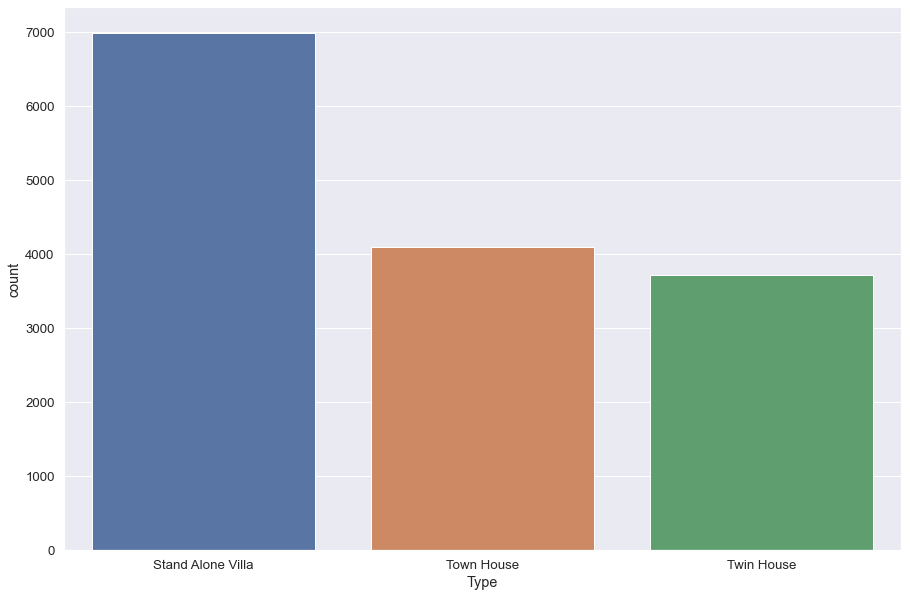

In [60]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df)


>**is Stand Alone Villa**

>>what is the most common structure for the villas

<AxesSubplot:xlabel='Type', ylabel='count'>

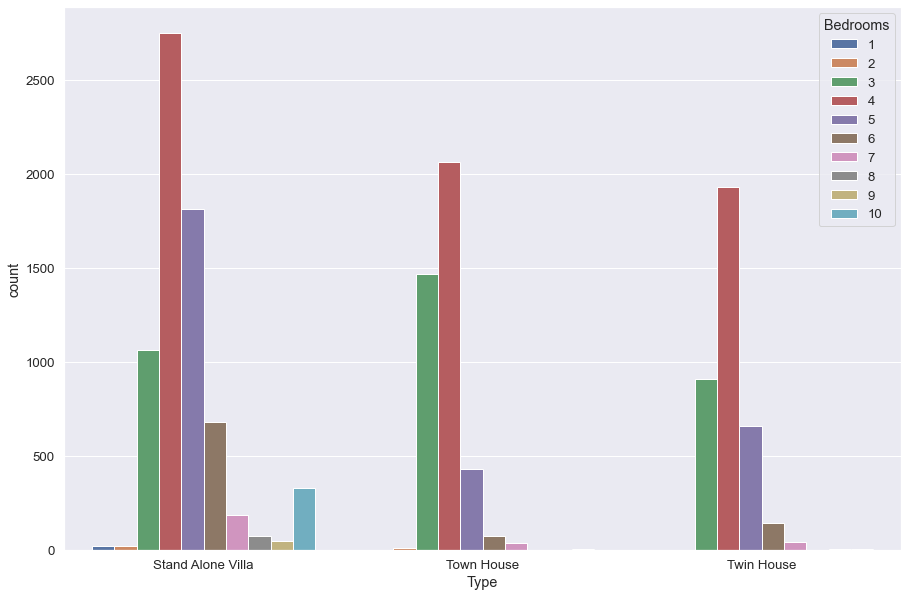

In [61]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

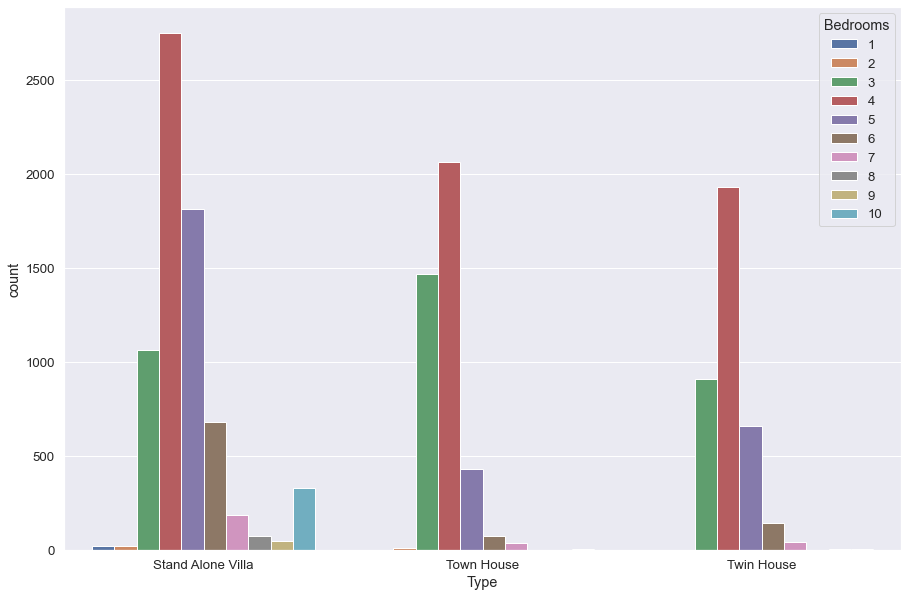

In [62]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Bedrooms")


<AxesSubplot:xlabel='Type', ylabel='count'>

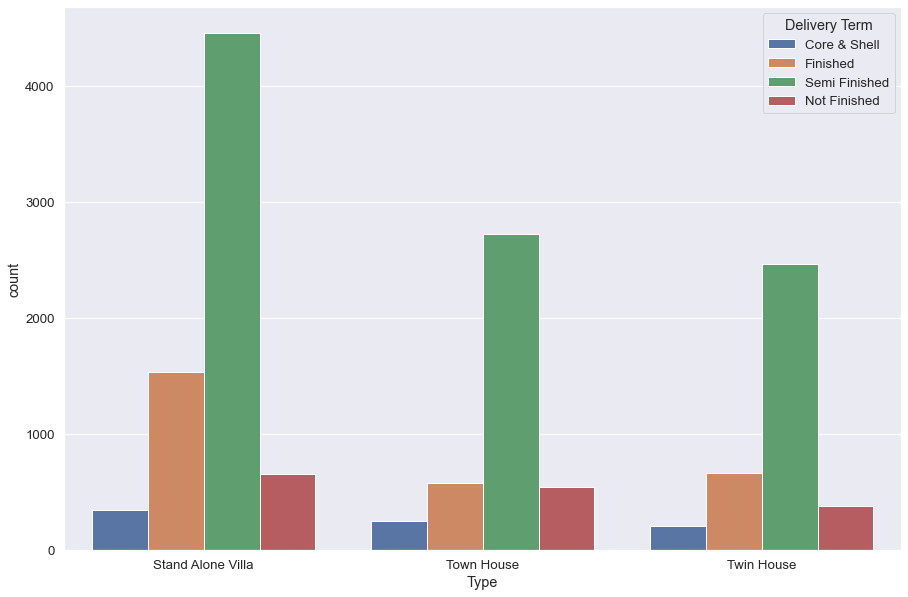

In [63]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","cat","Delivery Term","Delivery Date","Payment Option","negotiable"]
sns.countplot(x='Type', data=df ,hue="Delivery Term")


<AxesSubplot:xlabel='Type', ylabel='count'>

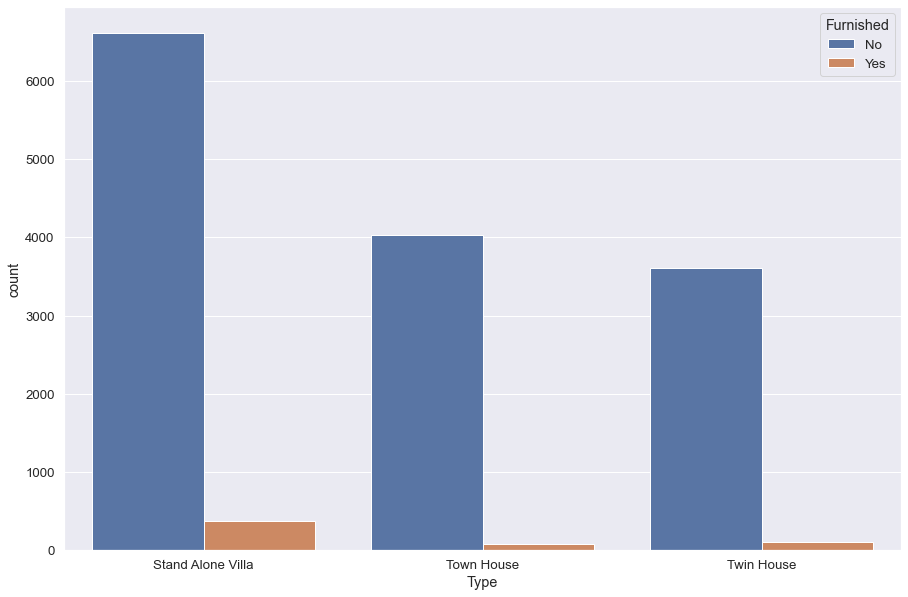

In [64]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option"]
sns.countplot(x='Type', data=df ,hue="Furnished")


Semi Finished    0.651161
Finished         0.187483
Not Finished     0.107278
Core & Shell     0.054078
Name: Delivery Term, dtype: float64


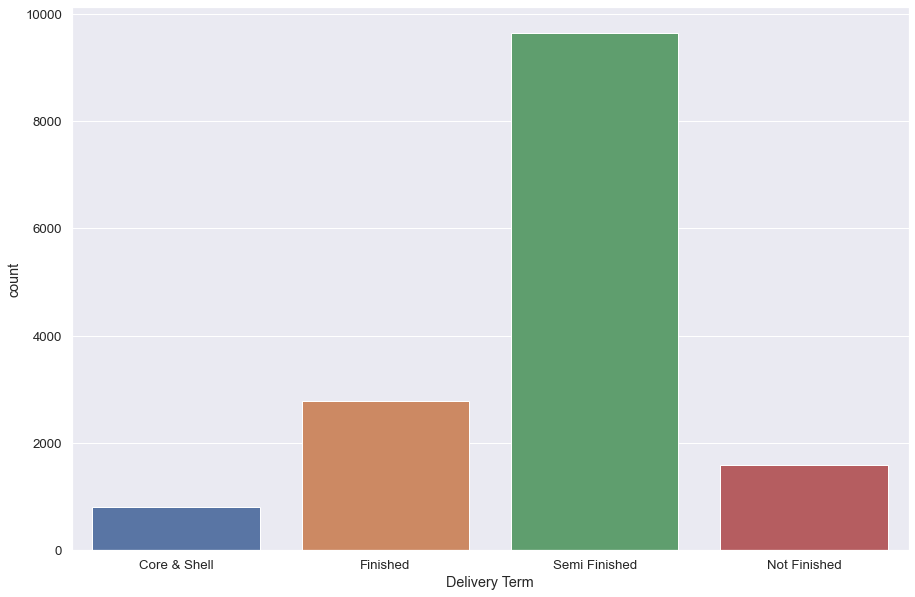

Ready to move      0.856130
soon               0.042601
2024               0.033891
2025               0.024710
2023               0.015730
within 6 months    0.011410
2022               0.009924
2026               0.005604
Name: Delivery Date, dtype: float64


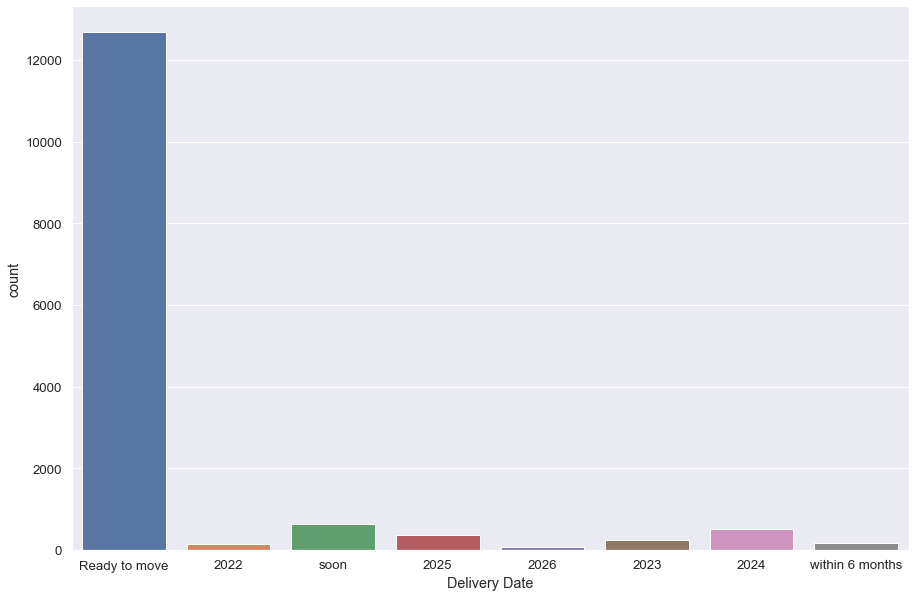

Cash                   0.604915
Cash or Installment    0.241966
Installment            0.153119
Name: Payment Option, dtype: float64


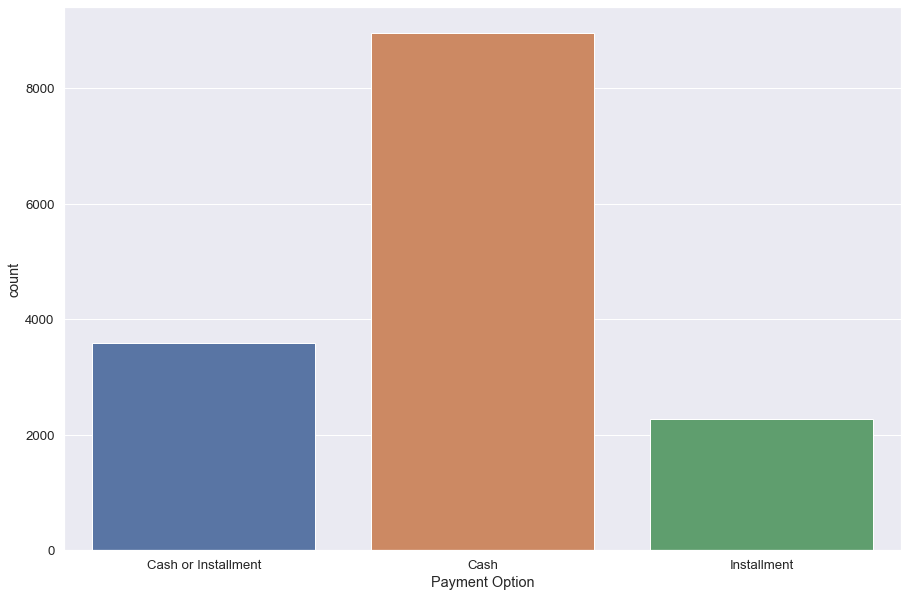

In [65]:
for i in catgorical_columns[4:]:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

<AxesSubplot:>

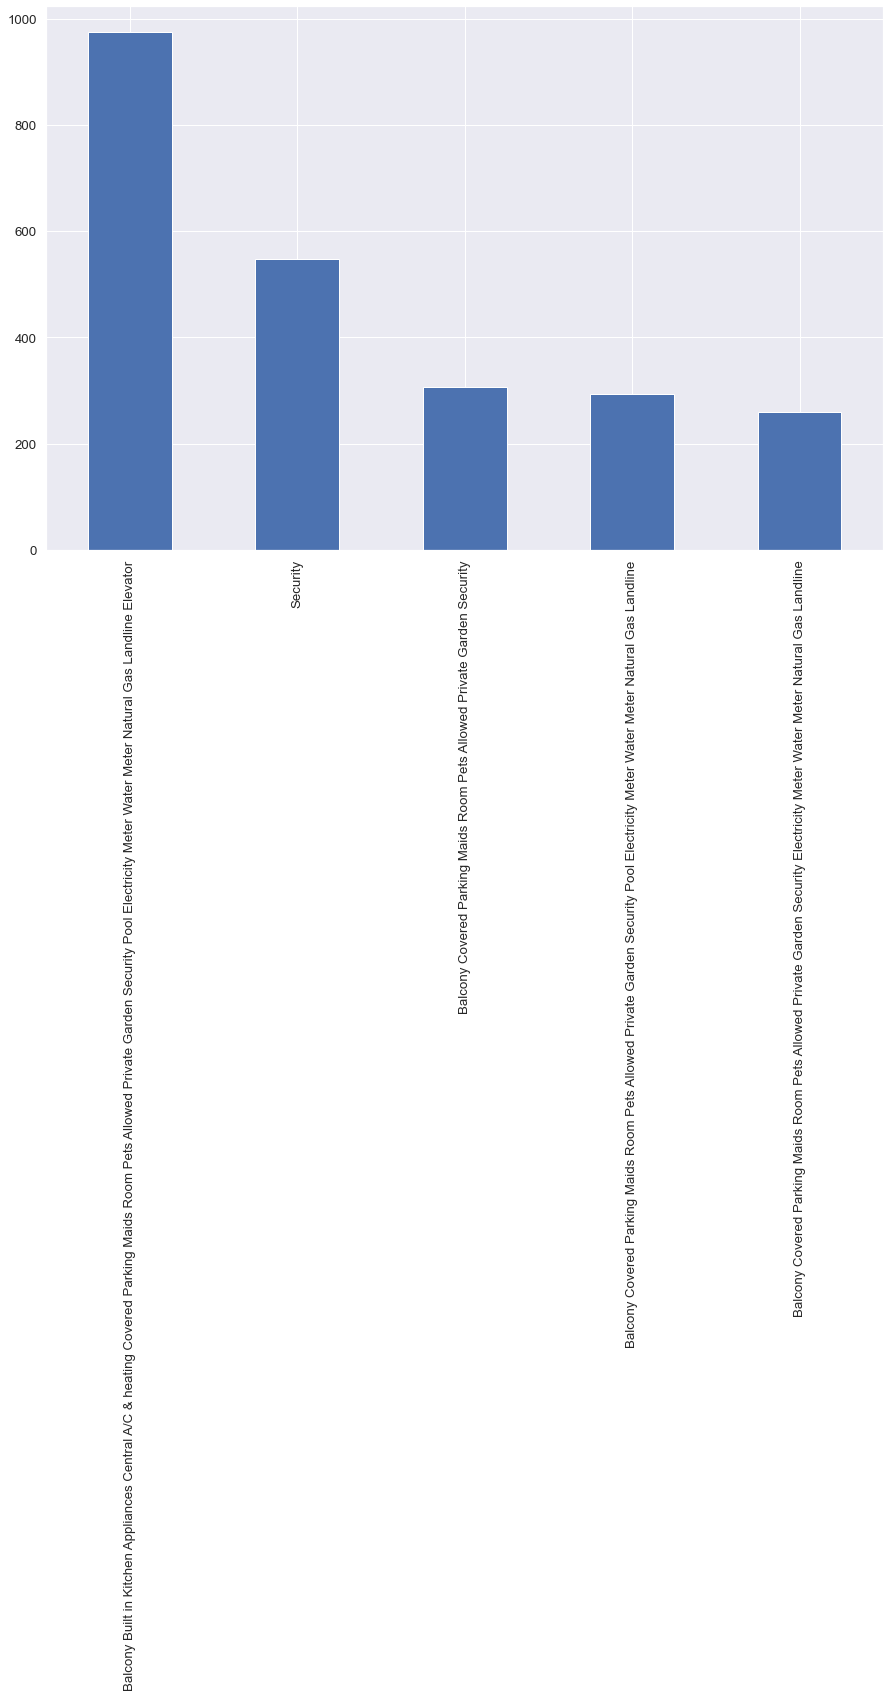

In [66]:
df['Amenities'].value_counts().head(5).plot(kind = 'bar')

>> what is the ratio for each Amenity in Amenities

1.0    0.680309
0.0    0.319691
Name: Parking, dtype: float64


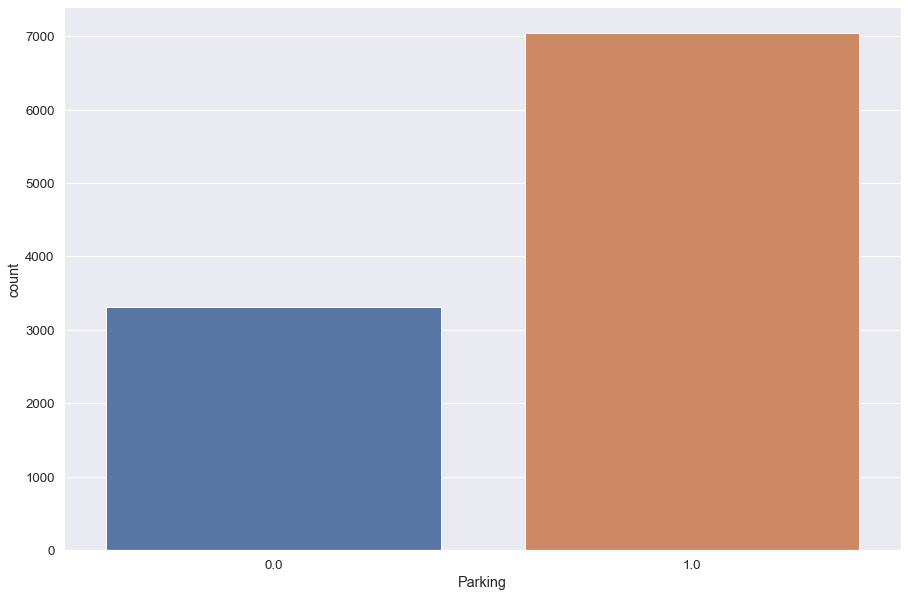

1.0    0.51168
0.0    0.48832
Name: Landline, dtype: float64


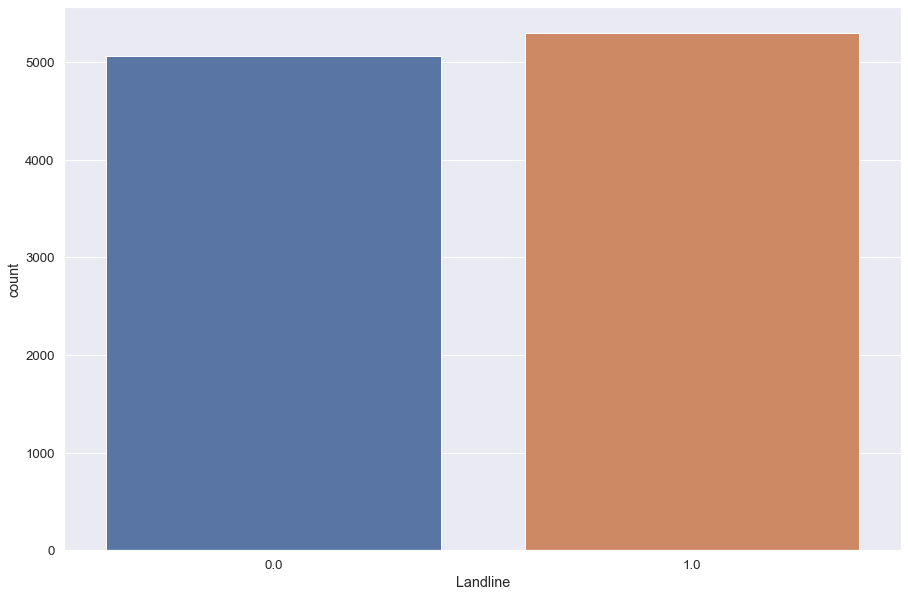

1.0    0.680309
0.0    0.319691
Name: Covered, dtype: float64


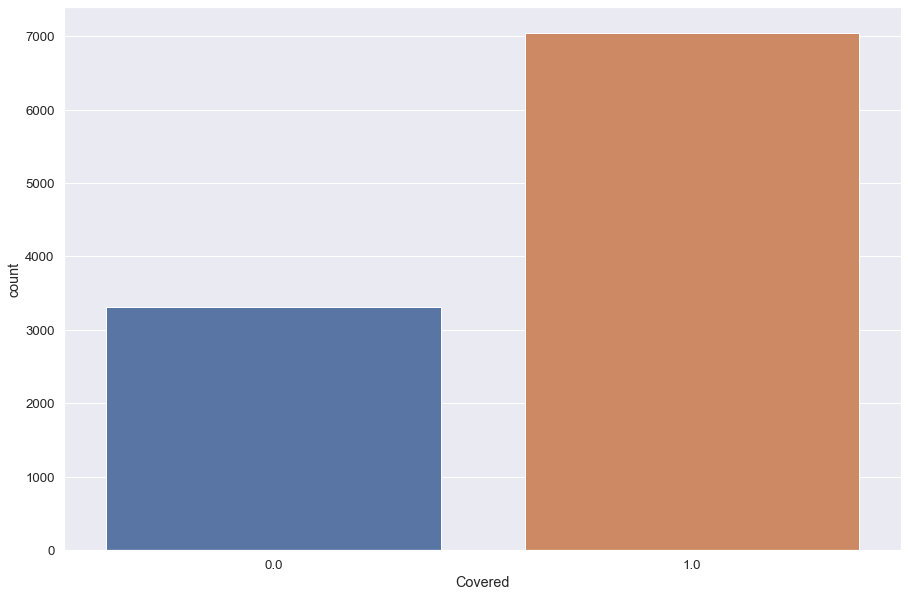

0.0    0.681564
1.0    0.318436
Name: A/C, dtype: float64


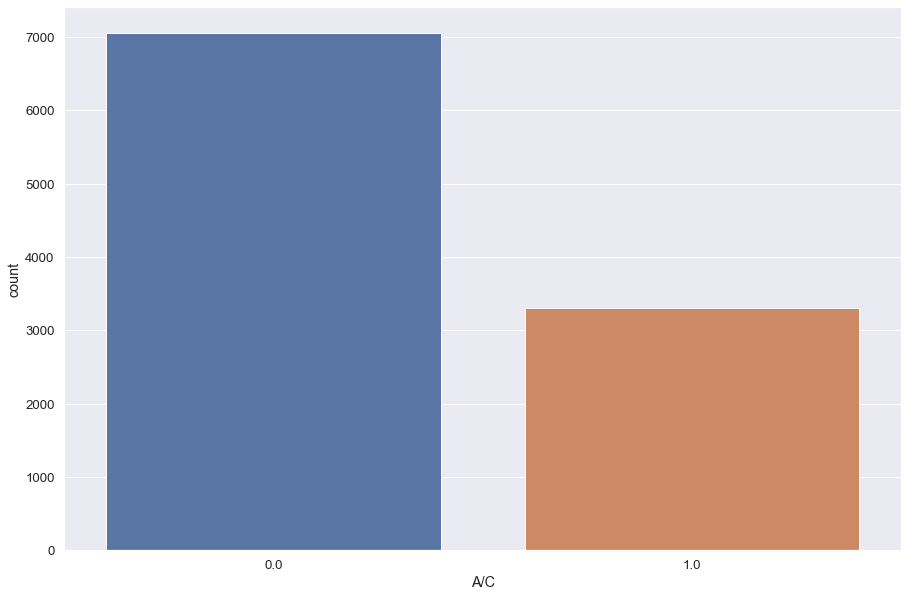

1.0    0.591892
0.0    0.408108
Name: Gas, dtype: float64


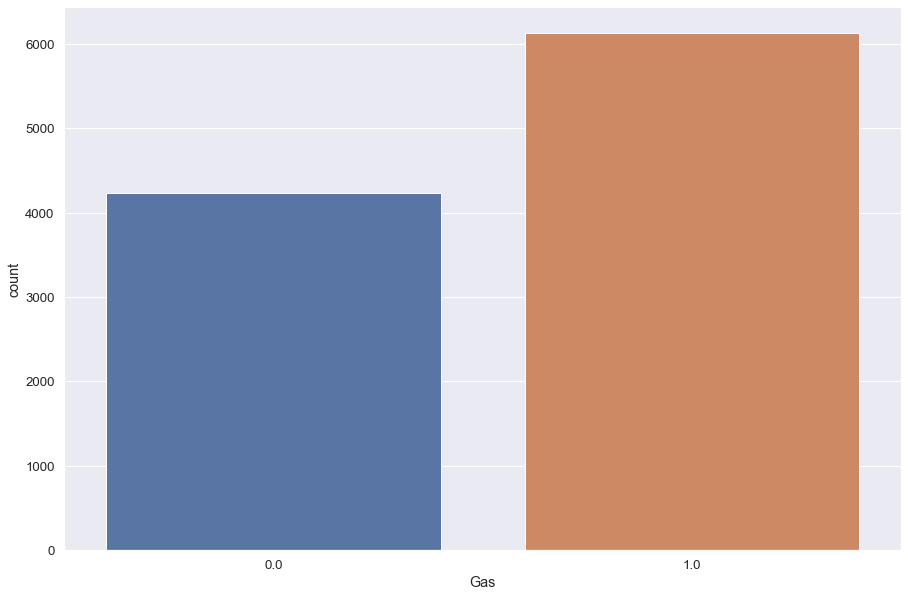

1.0    0.928282
0.0    0.071718
Name: Security, dtype: float64


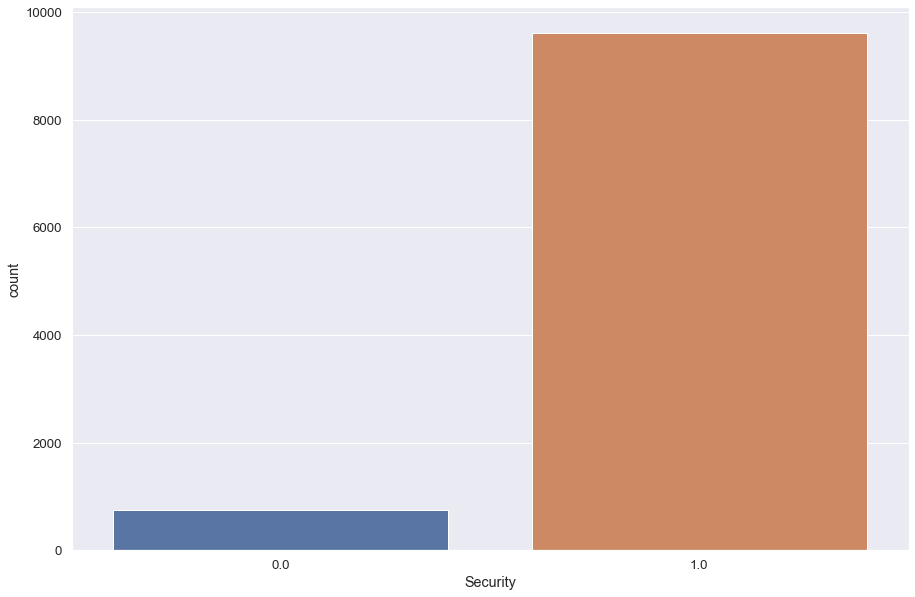

1.0    0.591892
0.0    0.408108
Name: Natural, dtype: float64


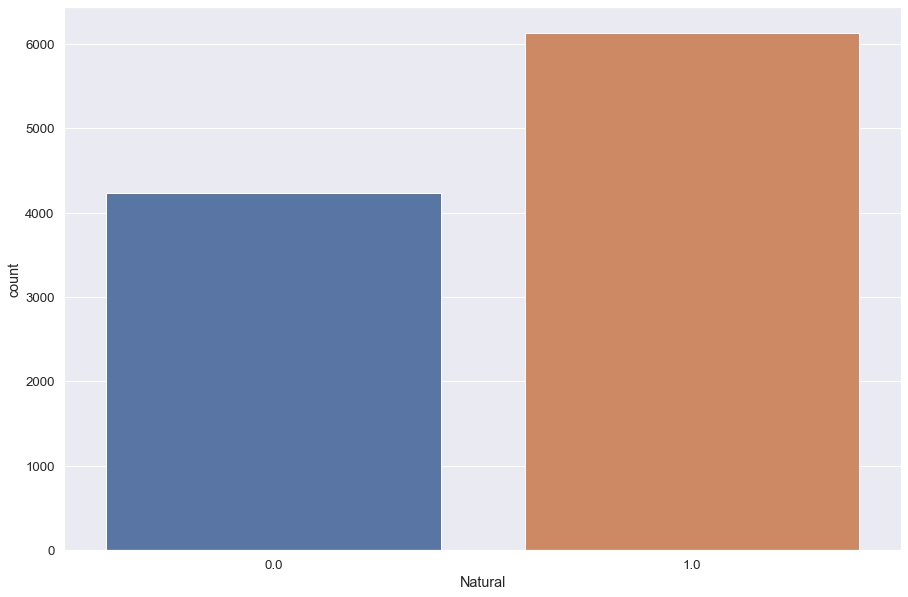

1.0    0.673938
0.0    0.326062
Name: Water, dtype: float64


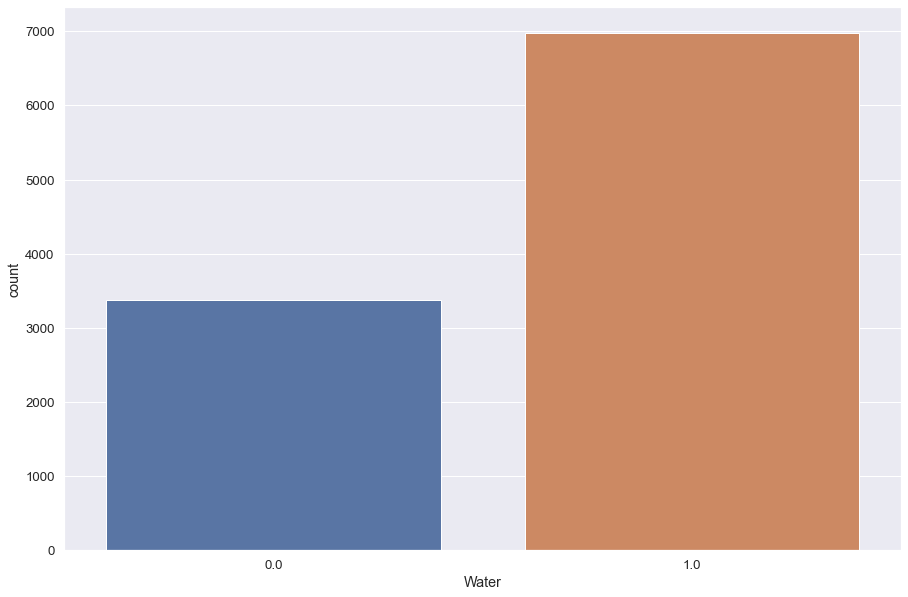

0.0    0.77751
1.0    0.22249
Name: Elevator, dtype: float64


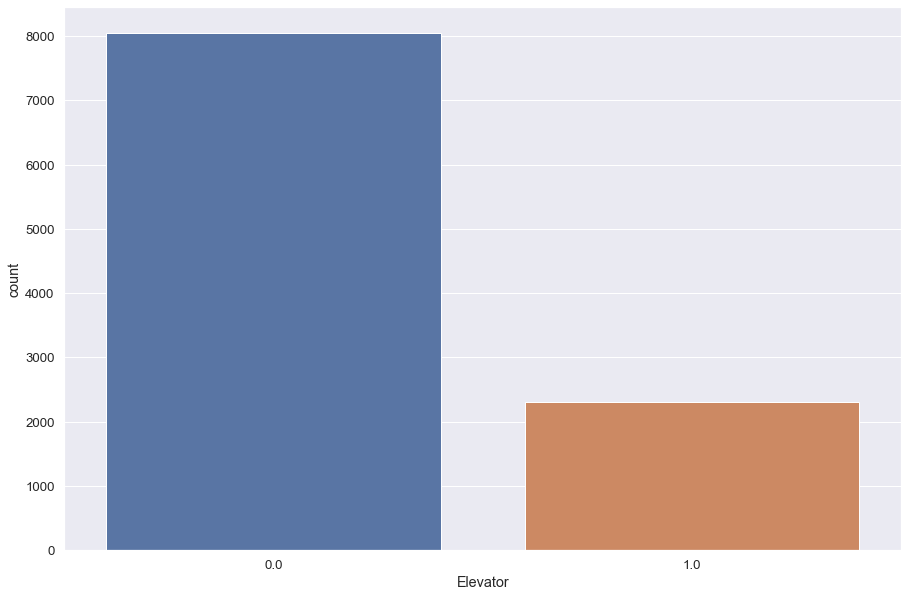

0.0    0.605598
1.0    0.394402
Name: Pool, dtype: float64


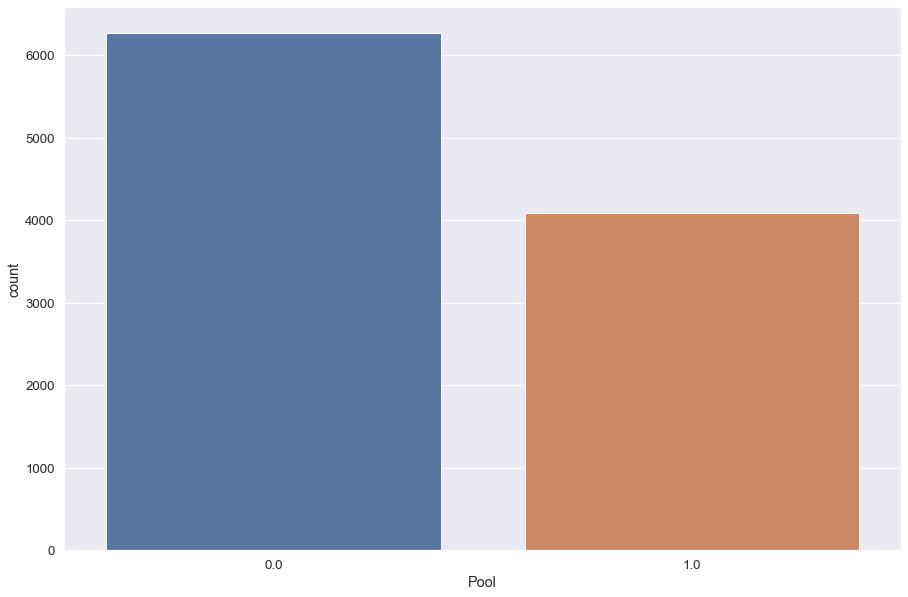

1.0    0.799421
0.0    0.200579
Name: Pets, dtype: float64


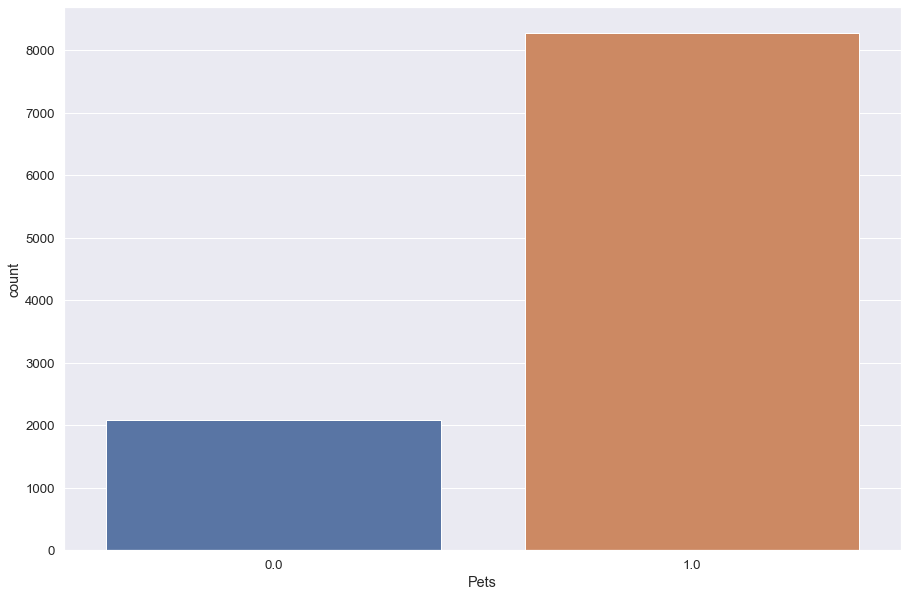

0.0    0.750676
1.0    0.249324
Name: Kitchen, dtype: float64


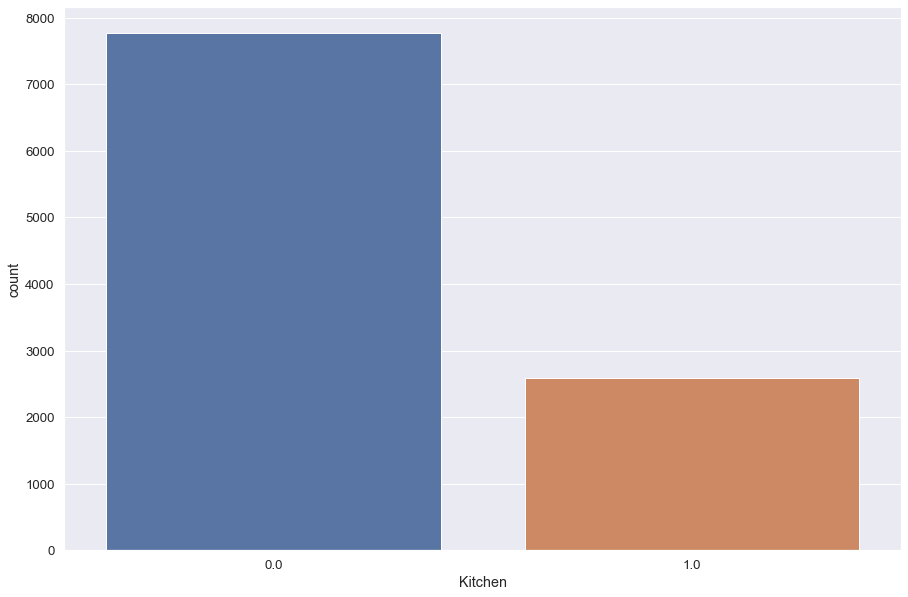

1.0    0.687355
0.0    0.312645
Name: Maids, dtype: float64


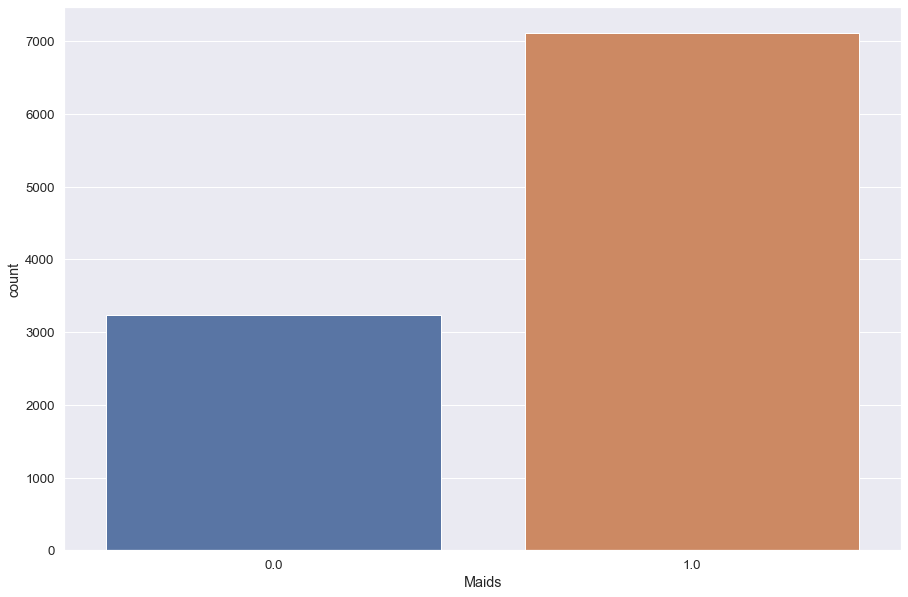

1.0    0.664382
0.0    0.335618
Name: Electricity, dtype: float64


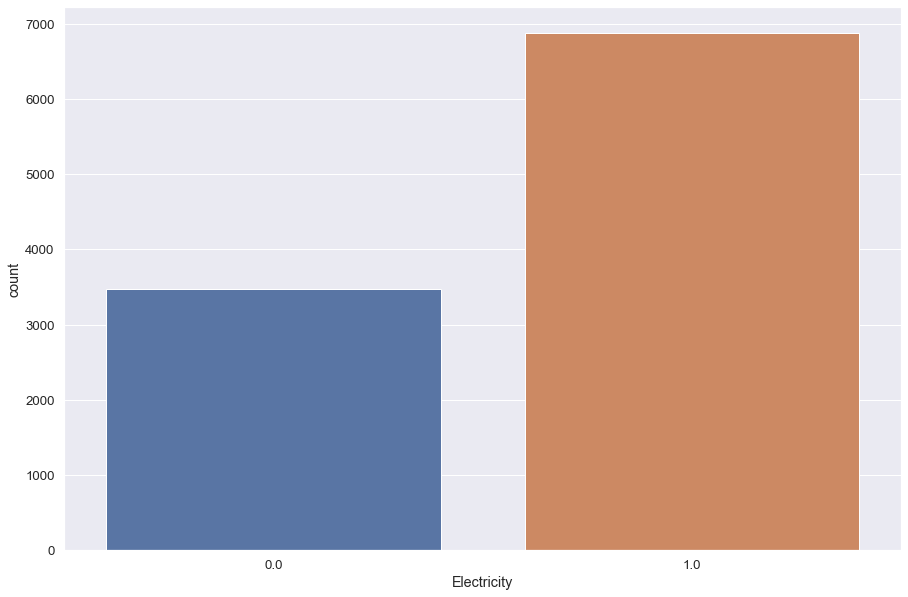

1.0    0.838417
0.0    0.161583
Name: Garden, dtype: float64


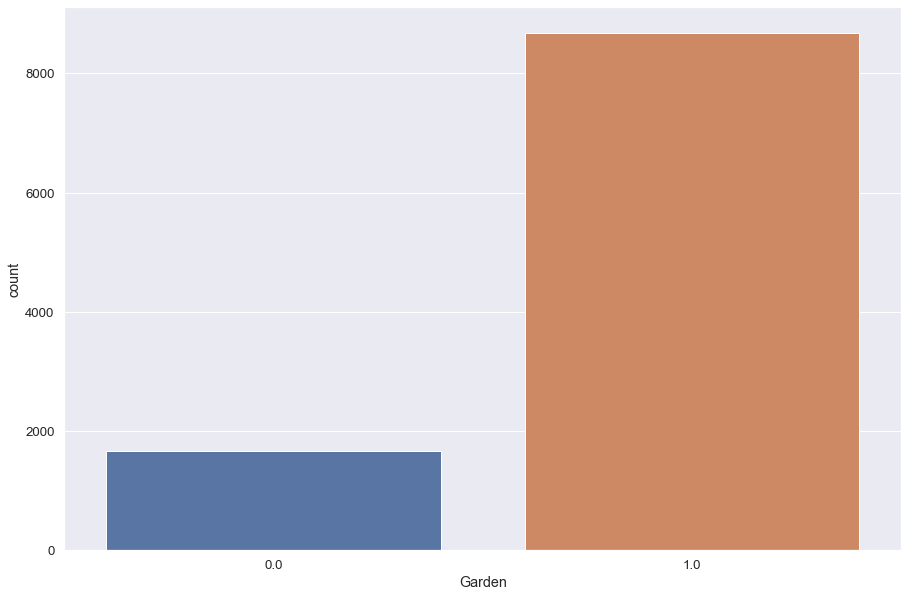

1.0    0.868436
0.0    0.131564
Name: Balcony, dtype: float64


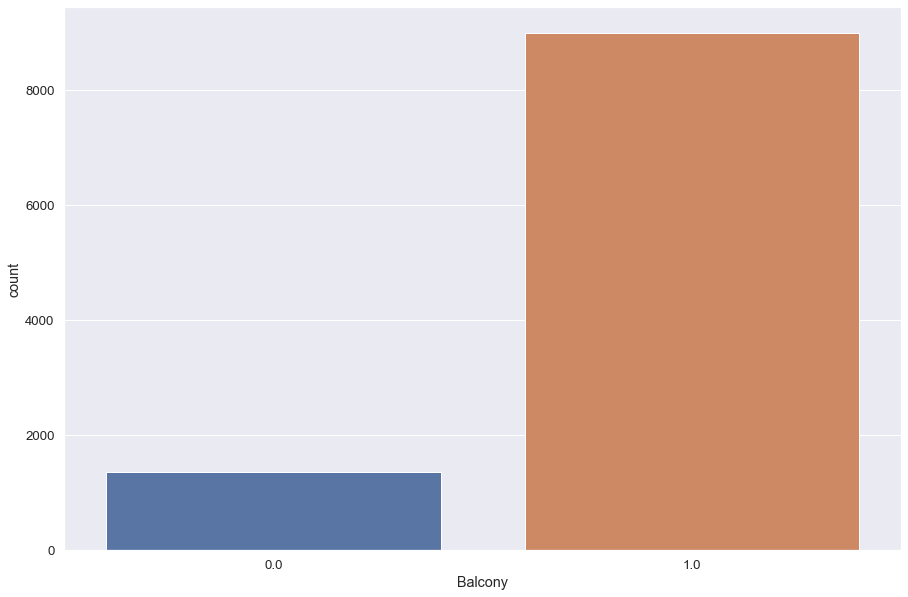

In [67]:
for i in rows:
    temp_series = df[i].value_counts(normalize = True)
    print(temp_series)
    sns.countplot(x=i, data=df)
    plt.show()

>**the most common structure for the villas is**<br>
>4 bedRooms<br>
>4 bathRooms<br>
>semi finished<br>
>**The most common Amenity is security**<br>
>**the most common Amenities for the villas is**<br>
>-Balcony Built in Kitchen Appliances Central A/C & heating Covered Parking Maids Room Pets Allowed Private Garden Security Pool Electricity Meter Water Meter Natural Gas Landline Elevator<br>

>****Bivariate****

In [68]:
catgorical_columns=["Bedrooms","Bathrooms","Furnished","Type","Delivery Term","Delivery Date","Payment Option","negotiable"]
df['Bedrooms']=df['Bedrooms'].astype('category')
df['Bathrooms']=df['Bathrooms'].astype('category')
df['negotiable']=df['negotiable'].astype('category')

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\4011278128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bedrooms']=df['Bedrooms'].astype('category')
C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\4011278128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathrooms']=df['Bathrooms'].astype('category')
C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\4011278128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

>the value that appears most  in  the dataframe


In [69]:
df.mode(axis=0, numeric_only=False, dropna=True)


,price,location,date,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Type,Payment Option,...,Natural,Water,Elevator,Pool,Pets,Kitchen,Maids,Electricity,Garden,Balcony
0,6500000,New Cairo - El Tagamoa، Cairo,2022-03-10,14,0,4,4,300,Stand Alone Villa,Cash,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


>-***so I need to measure the average price for each category in categorical columns to see how the design affects the price and select the best design to recommend to real state companies***<br>
>-***and see if the most common strucure avrage cost***<br>
>-***Let's see where public taste is heading***



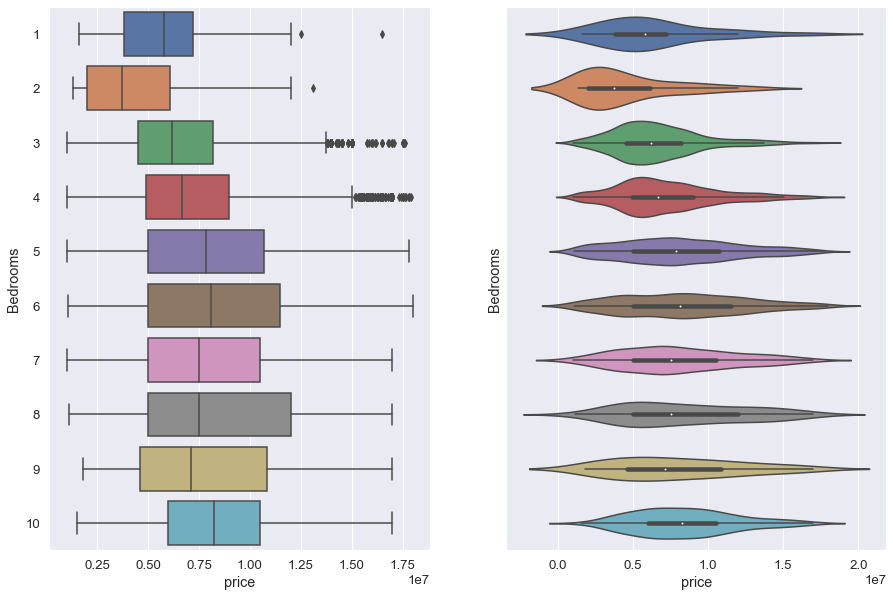

             Mean   Median
Bedrooms                  
1         6350000  5800000
2         4517567  3700000
3         6608273  6181000
4         7246302  6651012
5         8086240  7850000
6         8372289  8100000
7         8024917  7500000
8         8519595  7500000
9         7999760  7124999
10        8448071  8225000


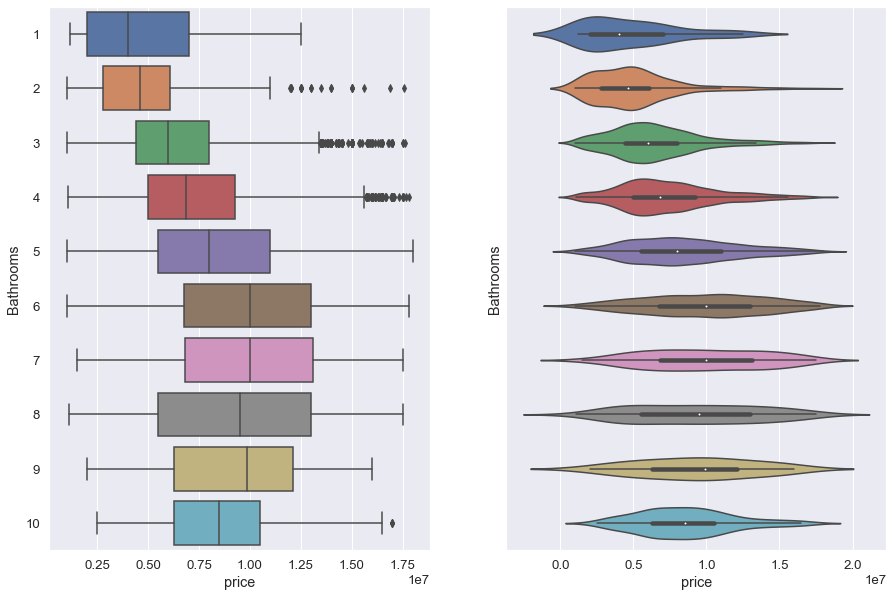

              Mean    Median
Bathrooms                   
1          4806311   4000000
2          5040653   4600000
3          6435207   6000000
4          7353066   6850000
5          8398900   8000000
6          9815792  10000000
7          9869652  10000000
8          9337572   9500000
9          9262304   9875000
10         8608282   8500000


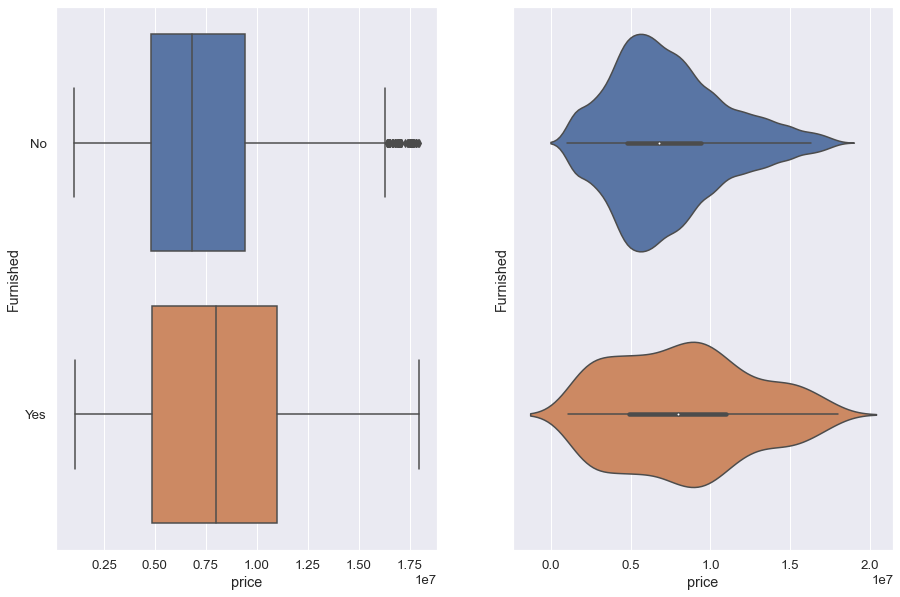

              Mean   Median
Furnished                  
No         7339110  6800000
Yes        8282531  8000000


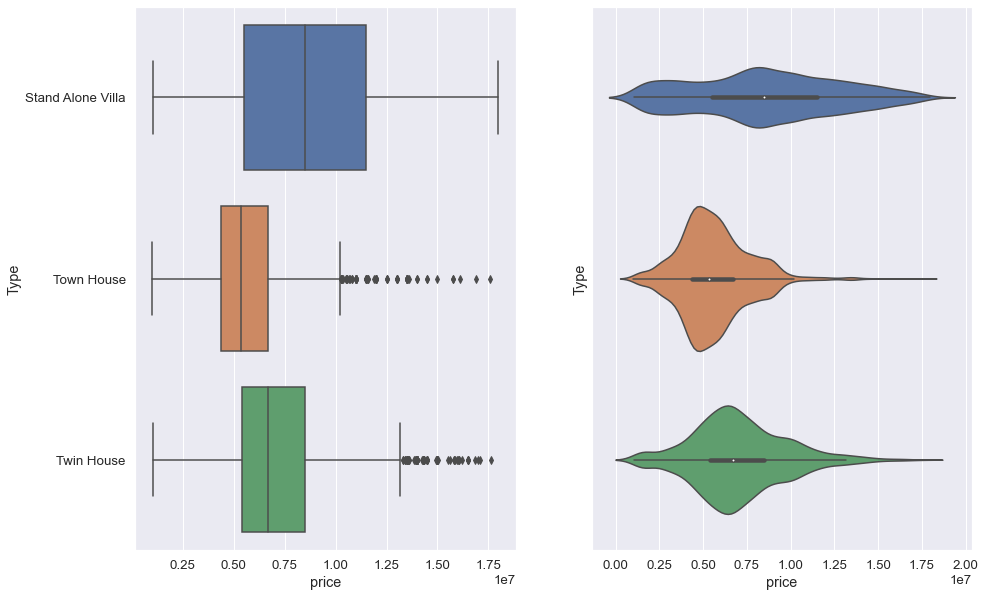

                      Mean   Median
Type                               
Stand Alone Villa  8597390  8500000
Town House         5600432  5350000
Twin House         7032658  6700000


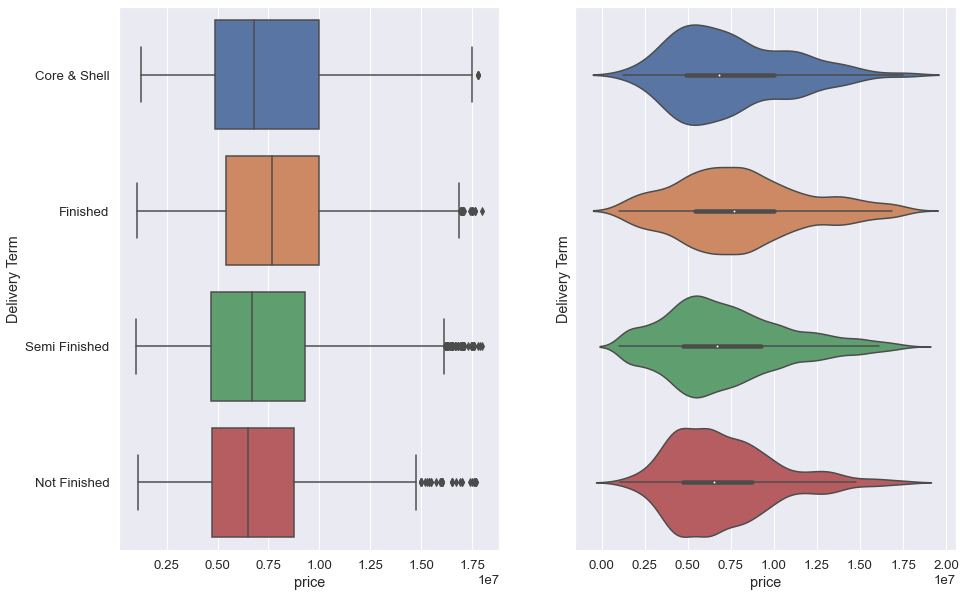

                  Mean   Median
Delivery Term                  
Core & Shell   7502322  6800000
Finished       8044583  7688000
Not Finished   7100131  6500000
Semi Finished  7216876  6695656


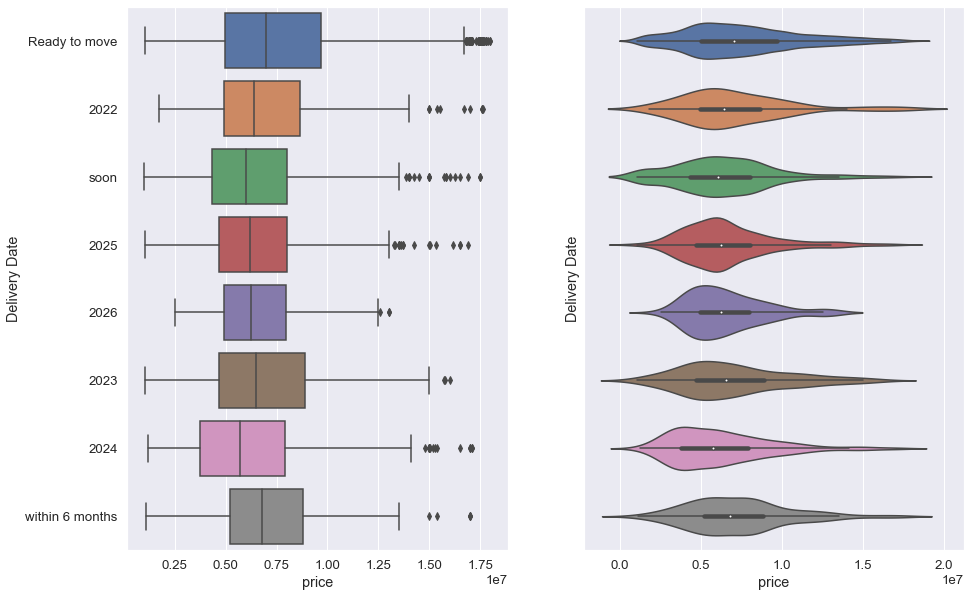

                    Mean   Median
Delivery Date                    
2022             7096130  6400000
2023             6994054  6500000
2024             6225475  5700000
2025             6620065  6200000
2026             6563625  6250000
Ready to move    7509465  7000000
soon             6366854  6022000
within 6 months  7262575  6800000


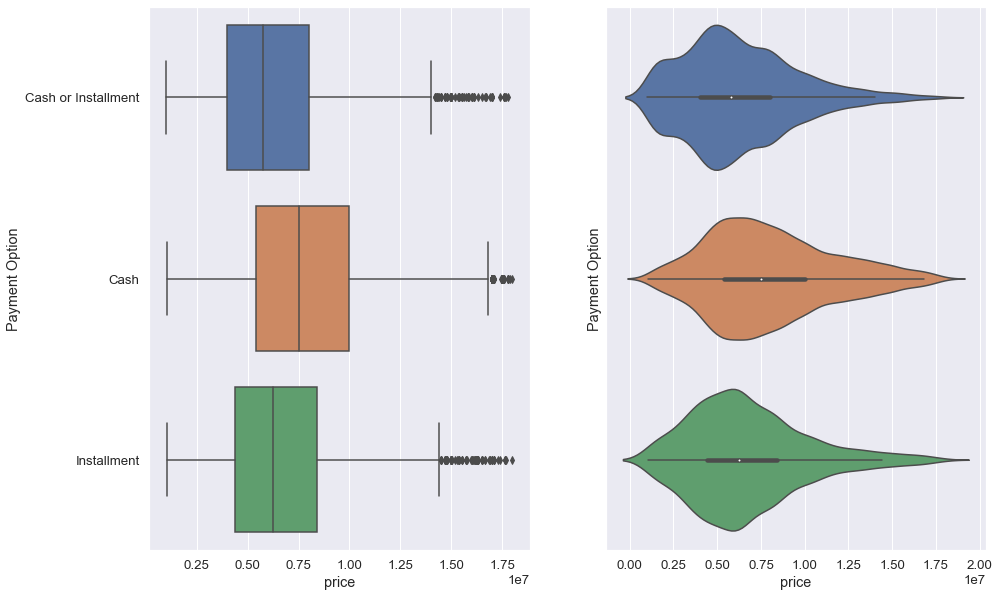

                        Mean   Median
Payment Option                       
Cash                 7995086  7500000
Cash or Installment  6239642  5760000
Installment          6719221  6239000


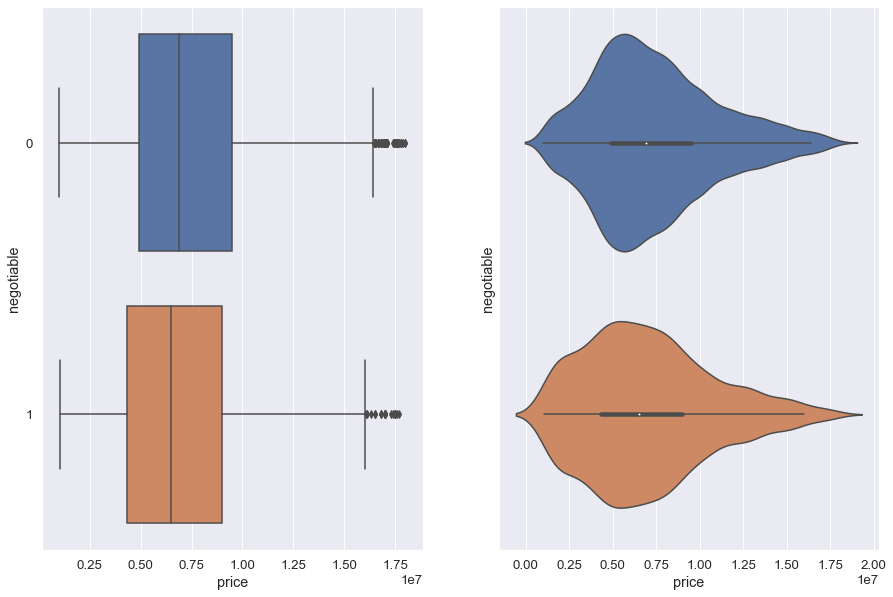

               Mean   Median
negotiable                  
0           7433816  6890000
1           6982888  6500000


In [70]:
for column_name in catgorical_columns:

    print('=' * 80)
    
    x = 'price'
    
    fig, axs = plt.subplots(1, 2, sharey = True)
    sns.boxplot(data = df, x = x, y = column_name, ax = axs[0])
    sns.violinplot(data = df, x = x, y = column_name, ax = axs[1])
    plt.show()
    
    means = df.groupby(column_name)[x].mean()
    medians = df.groupby(column_name)[x].median()

    statsicates = pd.DataFrame()
    statsicates['Mean'] = means
    statsicates['Median'] = medians
    statsicates[['Mean', 'Median']] = statsicates[['Mean', 'Median']].astype(int)
    print(statsicates)

>from this graphes i figerout <br>
>- the avrage price of unnegotiable_prices  is higher than negotiable_prices so it is the most common convention between seller and buyer<br>
>- and as all of us perfer in payment options when u a seller is to take all your mony  all at once so the avrage price of the cash catgory is th heigst<br> 
>- the most user of the olx is real seller to avoid the fees of house broker<br>
>- and there are a many companies that offers inly instromantel payment opetion and that gives us aproblity this project Not completed yet and i dont recommend this type of online sellers <br>
>- as we see in Delivery date column the ready to move has the most avrage price because its a reall villas so it u will have summer watermalon in your tumy when u will buy the property<br>
>- the avrage price of finished catgory is the heighst because the finishing process has been done<br>
>- the avrage price of Furnished(on the key)catgory is the heighst because  it ready to move on it without any affort<br> 
                    

>- in this graph i display the Area ,price and the Payment Option for each category in type 

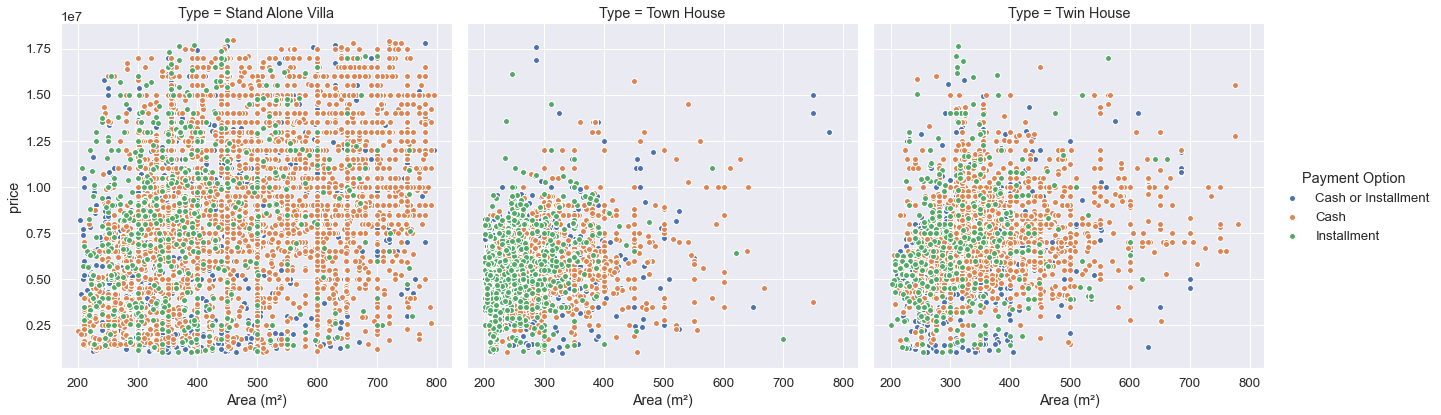

In [71]:
sns.FacetGrid(df, col ="Type",  hue ="Payment Option",height=6).map(plt.scatter,"Area (m²)",  "price", edgecolor ="w").add_legend()

> is the Type Payment Option effect on the area
>> and from this grapgh i figer_out
    

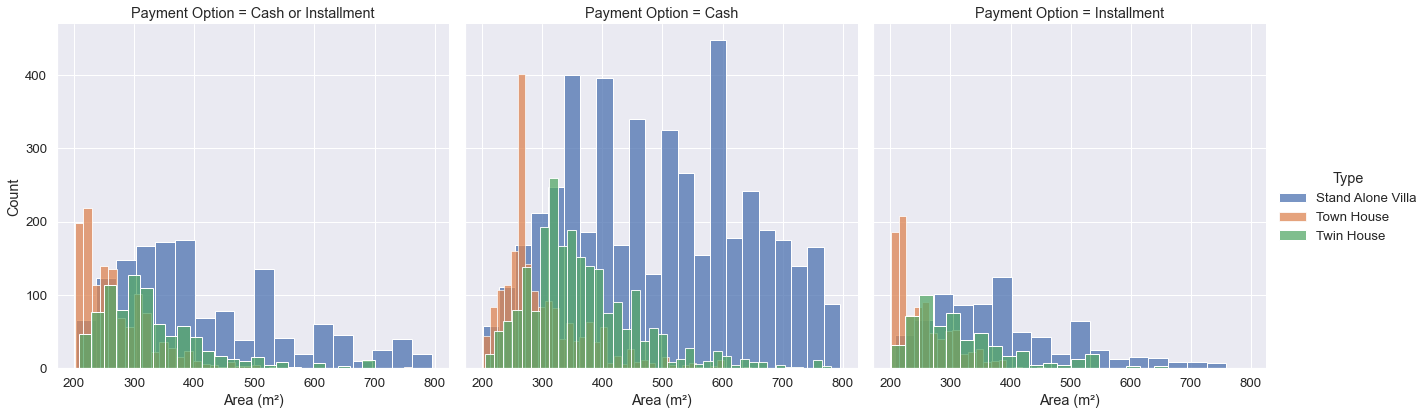

In [72]:
sns.FacetGrid(df, hue="Type", col="Payment Option",height=6).map_dataframe(sns.histplot, x="Area (m²)").add_legend()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14812 entries, 0 to 14811
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           14812 non-null  int64         
 1   location        14812 non-null  object        
 2   date            14812 non-null  datetime64[ns]
 3   viwers          14812 non-null  int32         
 4   negotiable      14812 non-null  category      
 5   Bedrooms        14812 non-null  category      
 6   Bathrooms       14812 non-null  category      
 7   Area (m²)       14812 non-null  int32         
 8   Type            14812 non-null  object        
 9   Payment Option  14812 non-null  object        
 10  Compound        14812 non-null  object        
 11  Delivery Term   14812 non-null  object        
 12  Amenities       10360 non-null  object        
 13  Furnished       14812 non-null  object        
 14  Delivery Date   14812 non-null  object        
 15  mo

>- if u someones whose work real estate investment or broker   


<AxesSubplot:xlabel='price'>

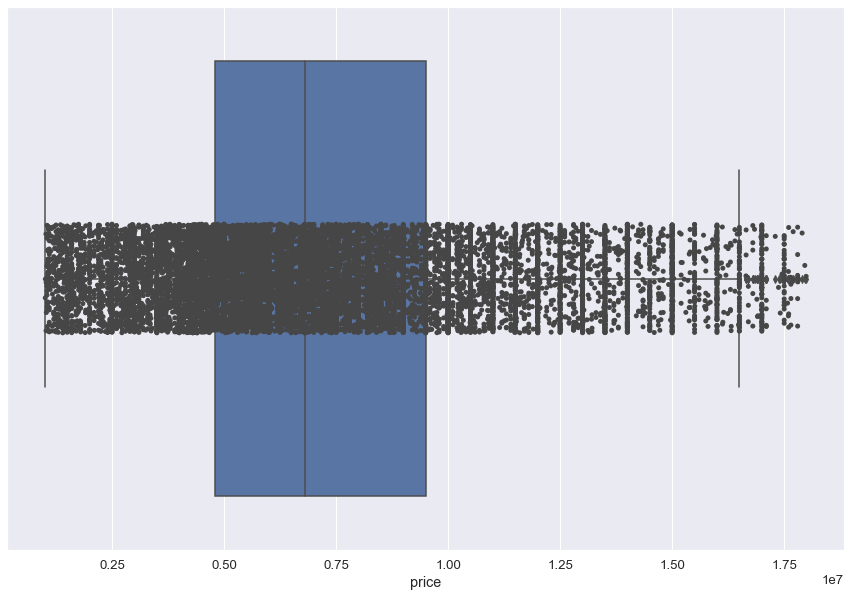

In [74]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


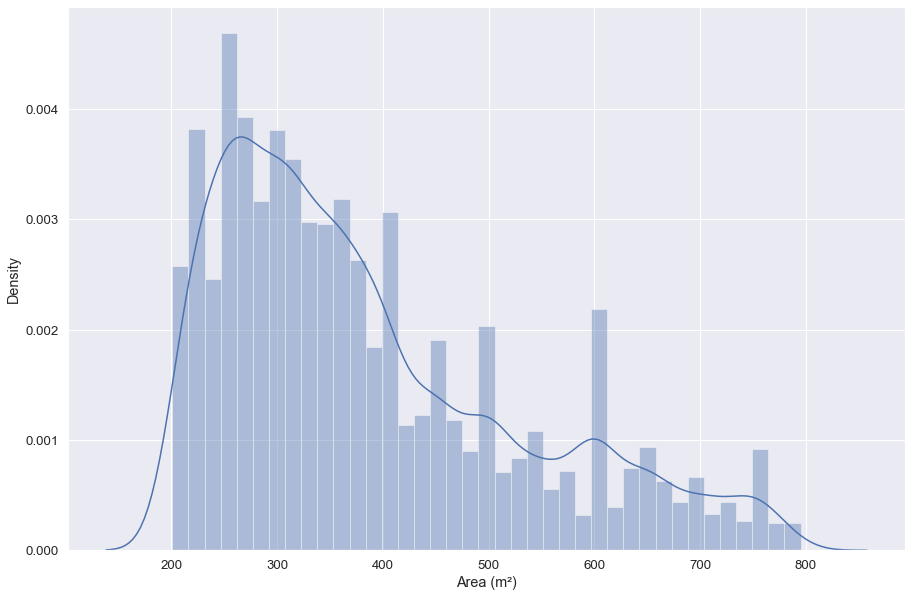

In [75]:
ax = sns.distplot(df["Area (m²)"])


c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


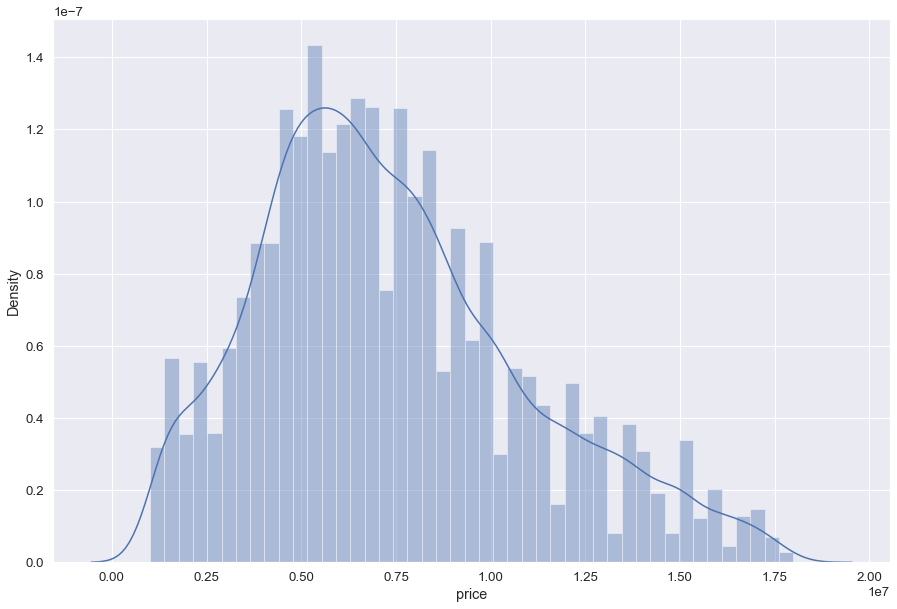

In [76]:
ax = sns.distplot(df["price"])


In [77]:
df['Bedrooms']=df['Bedrooms'].astype('int')
df['Bathrooms']=df['Bathrooms'].astype('int')

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\1430150410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bedrooms']=df['Bedrooms'].astype('int')
C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\1430150410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathrooms']=df['Bathrooms'].astype('int')


In [78]:
df['Bedrooms'].value_counts()

4     6745
3     3444
5     2905
6      898
10     342
7      269
8       85
9       62
2       37
1       25
Name: Bedrooms, dtype: int64

In [79]:
# def bbb(z):
#     if z=="Finished":
#         return 1      
#     elif z== "Semi Finished":
#         return 2    
#     elif z=="Not Finished":
#         return 3      
#     elif z=="Core & Shell":
#      return 4
#     else:
#         return z
# df['Delivery Term']=df['Delivery Term'].apply(bbb)
# df['Delivery Term'].value_counts()

In [80]:
# cats={'Cash or Installment': 1.0,
#  'Cash':                          2.0, 
#  'Installment':                   3.0}
# df['Payment Option']=df['Payment Option'].map(cats)
# print(df['Payment Option'].value_counts())


In [81]:
# cats2={'Ready to move': 1.0,
#        'within 6 months': 2.0,
#           'soon': 2.0,
#           '2022': 3.0, 
#           '2023': 4.0,    
#           '2024': 5.0, 
#           '2025': 6.0, 
#           '2026': 7.0, 
#      } 
# df['Delivery Date']=df['Delivery Date'].map(cats2)
# print(df['Delivery Date'].value_counts())

In [82]:
df.loc[df['Amenities'].isnull(),rows]=[0 for i in range(len(rows))] 

In [83]:
# xv=list(df.columns)
# column=xv[xv.index('Delivery Term'):]
# column.remove('month')
# column.remove('Amenities')
# column.remove('Furnished')

# column.append('Payment Option')

# column

In [84]:
# for i in column:
#     print(i)
#     print(df[i].value_counts())
#     print("*"*80)

In [85]:
df.reset_index(drop=True,inplace=True)

In [86]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Type                 0
Payment Option       0
Compound             0
Delivery Term        0
Amenities         4452
Furnished            0
Delivery Date        0
month                0
Parking              0
Landline             0
Covered              0
A/C                  0
Gas                  0
Security             0
Natural              0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

In [87]:
df['Furnished']=df['Furnished'].map({'No':0,'Yes':1})

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\2167900573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnished']=df['Furnished'].map({'No':0,'Yes':1})


In [88]:
df['Compound']=df['Compound'].fillna('not')

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\2060868164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Compound']=df['Compound'].fillna('not')


In [89]:
# cats={'Cash or Installment': 1.0,
#  'Cash':                     2.0, 
#  'Installment':              3.0}

# cats_R={}
# for i ,v in cats.items():
#     cats_R[v]=i
# cats_R
# df['Payment Option']=df['Payment Option'].map(cats_R)



    
# cats_R={1 : "Finished",    
# 2:"Semi Finished",
# 3:"Not Finished",    
# 4:"Core & Shell"}
# df['Delivery Term']=df['Delivery Term'].map(cats_R)

# cats2={'Ready to move': 1.0,
#           'soon': 2.0,
#           '2022': 3.0, 
#           '2023': 4.0,    
#           '2024': 5.0, 
#           '2025': 6.0, 
#           '2026': 7.0, 
#      } 
# cats_R={}
# for i ,v in cats2.items():
#     if v not in cats_R.values():
#         cats_R[v]=i
# cats_R

# df['Delivery Date']=df['Delivery Date'].map(cats_R)

In [90]:
df.isnull().sum()

price                0
location             0
date                 0
viwers               0
negotiable           0
Bedrooms             0
Bathrooms            0
Area (m²)            0
Type                 0
Payment Option       0
Compound             0
Delivery Term        0
Amenities         4452
Furnished            0
Delivery Date        0
month                0
Parking              0
Landline             0
Covered              0
A/C                  0
Gas                  0
Security             0
Natural              0
Water                0
Elevator             0
Pool                 0
Pets                 0
Kitchen              0
Maids                0
Electricity          0
Garden               0
Balcony              0
dtype: int64

In [91]:
# xxx={1:3,
#  2:3,
#  8:7}
# for k,v in xxx.items():
#     df['Bedrooms']=df['Bedrooms'].replace(k,v)
# xxx={1:3,
#  2:3,
#  8:7,
#  7:6}
# for k,v in xxx.items():
#     df['Bathrooms']=df['Bathrooms'].replace(k,v)

In [92]:
df['meter_price']=x = round(df['price']/df['Area (m²)'],2)

C:\Users\Moham\AppData\Local\Temp\ipykernel_21064\1597107655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meter_price']=x = round(df['price']/df['Area (m²)'],2)


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
data=pd.get_dummies(df, columns = ['Type', 'Payment Option','Compound','Delivery Term','Delivery Date'], drop_first = True)
data

,price,location,date,viwers,negotiable,Bedrooms,Bathrooms,Area (m²),Amenities,Furnished,...,Delivery Term_Finished,Delivery Term_Not Finished,Delivery Term_Semi Finished,Delivery Date_2023,Delivery Date_2024,Delivery Date_2025,Delivery Date_2026,Delivery Date_Ready to move,Delivery Date_soon,Delivery Date_within 6 months
0,7400000,Sheikh Zayed، Giza,2022-03-09,54,0,4,4,338,NaN,0,...,0,0,0,0,0,0,0,1,0,0
1,7700000,Rehab City، Cairo,2022-03-01,291,0,3,3,456,Balcony Pets Allowed Private Garden Security E...,0,...,1,0,0,0,0,0,0,1,0,0
2,4900000,Shorouk City، Cairo,2022-01-10,205,0,4,2,245,Balcony Built in Kitchen Appliances Maids Room...,0,...,0,0,1,0,0,0,0,0,0,0
3,6500000,"New Cairo - El Tagamoa, Cairo",2022-03-10,67,0,4,4,255,Private Garden Security,0,...,0,0,1,0,0,0,0,1,0,0
4,5035000,Nasr City، Cairo,2022-01-10,179,0,4,2,260,Balcony Central A/C & heating Maids Room Pets ...,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,6200000,New Cairo - El Tagamoa، Cairo,2022-01-23,10,0,4,4,300,Balcony Covered Parking Maids Room Pets Allowe...,0,...,0,0,1,0,0,0,0,1,0,0
14808,15380000,"New Cairo - El Tagamoa, Cairo",2022-01-23,12,0,5,5,630,Private Garden Built in Kitchen Appliances Bal...,0,...,0,0,0,0,0,0,0,1,0,0
14809,5500000,"Sheikh Zayed, Giza",2022-01-23,20,0,5,6,250,NaN,0,...,0,0,1,0,0,0,0,1,0,0
14810,5500000,"Sheikh Zayed, Giza",2022-01-23,13,0,5,6,250,NaN,0,...,0,0,1,0,0,0,0,1,0,0


In [95]:
x=data.drop(['price','viwers','date','location','negotiable','month','Amenities'],axis=1)
y = df['price']

In [96]:
x

,Bedrooms,Bathrooms,Area (m²),Furnished,Parking,Landline,Covered,A/C,Gas,Security,...,Delivery Term_Finished,Delivery Term_Not Finished,Delivery Term_Semi Finished,Delivery Date_2023,Delivery Date_2024,Delivery Date_2025,Delivery Date_2026,Delivery Date_Ready to move,Delivery Date_soon,Delivery Date_within 6 months
0,4,4,338,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,3,3,456,0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
2,4,2,245,0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,4,4,255,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0
4,4,2,260,0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,4,4,300,0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
14808,5,5,630,0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
14809,5,6,250,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
14810,5,6,250,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(max_depth=180),#max_depth=180
    'KNN': KNeighborsRegressor(n_neighbors=60),#n_neighbors=9
    'RF': RandomForestRegressor(n_estimators=100,max_depth=60),#n_estimators=200,max_depth=330
    'XGB': XGBRegressor(n_estimators=100)#n_estimators=200


}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    yt_pred = model.predict(x_train)

    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)
    print(f'TRAIN RMSE: {np.sqrt(mean_squared_error(y_train, yt_pred))}')
    print(f'TRAIN RMSE: {np.sqrt(mean_squared_error(y_train, yt_pred))}')
    print(f'TRAIN MAE: {mean_absolute_error(y_train, yt_pred)}')
    print(f'TRAIN R2: {r2_score(y_train, yt_pred)}')
    print('-'*50)

c:\Users\Moham\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Training LR...
Testing RMSE: 5.0135916768994056e+16
Testing RMSE: 5.0135916768994056e+16
Testing MAE: 1797636294063388.2
Testing R2: -1.991193166695167e+20
--------------------------------------------------
TRAIN RMSE: 925423.9779974727
TRAIN RMSE: 925423.9779974727
TRAIN MAE: 637837.2912522815
TRAIN R2: 0.9314722211138838
--------------------------------------------------
Training DT...
Testing RMSE: 149463.296547641
Testing RMSE: 149463.296547641
Testing MAE: 66521.85505831822
Testing R2: 0.998230361389326
--------------------------------------------------
TRAIN RMSE: 0.016262804875077003
TRAIN RMSE: 0.016262804875077003
TRAIN MAE: 0.0005289576449709392
TRAIN R2: 1.0
--------------------------------------------------
Training KNN...
Testing RMSE: 2329259.70803726
Testing RMSE: 2329259.70803726
Testing MAE: 1712706.8010126925
Testing R2: 0.5702149542508408
--------------------------------------------------
TRAIN RMSE: 2323586.543072559
TRAIN RMSE: 2323586.543072559
TRAIN MAE: 1728553.

In [100]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
x = pca.fit_transform(x)

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)


In [102]:
model = DecisionTreeRegressor()
params = [
    {'criterion': ['squared_error'], 'max_depth': range(1, 100)}
]
gs = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)


In [103]:
gs.fit(x, y)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error'],
                          'max_depth': range(1, 100)}],
             scoring='r2', verbose=3)

In [104]:
gs.best_score_

0.629584023491546

In [105]:
model0 = SVR()
params = [
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': range(2, 20)},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}
]
gs0 = GridSearchCV(estimator=model0, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs0.fit(x, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
gs0.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
model1 = RandomForestRegressor()
params = [
    {'max_depth': range(1, 40), 'n_estimators': range(100, 201, 10)}
]
gs1 = GridSearchCV(estimator=model1, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs1.fit(x, y)

In [ ]:
gs1.best_score_

In [ ]:
model2 = XGBRegressor()
params = [
    { 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]
gs2 = GridSearchCV(estimator=model2, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs2.fit(x, y)

In [ ]:
gs2.best_score_

In [ ]:
data=pd.get_dummies(df, columns = ['Type', 'Payment Option','Compound','Delivery Term','Delivery Date'], drop_first = True)
x=data.drop(['price','viwers','date','location','negotiable','month','Amenities','meter_price'],axis=1)
y = df['price']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)

In [ ]:
model3 = DecisionTreeRegressor()
params = [
    {'criterion': ['squared_error'], 'max_depth': range(1, 100)}
]
gs3 = GridSearchCV(estimator=model3, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)

In [ ]:
gs3.fit(x, y)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['squared_error'],
                          'max_depth': range(1, 100)}],
             scoring='r2', verbose=3)

In [ ]:
gs3.best_score_

0.359220784582938

In [ ]:
model04 = SVR()
params = [
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': range(2, 20)},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}
]
gs04 = GridSearchCV(estimator=model04, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs04.fit(x, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
gs04.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
model15 = RandomForestRegressor()
params = [
    {'max_depth': range(1, 40), 'n_estimators': range(100, 201, 10)}
]
gs15 = GridSearchCV(estimator=model15, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs15.fit(x, y)

In [ ]:
gs15.best_score_

In [ ]:
model26 = XGBRegressor()
params = [
    { 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]
gs26 = GridSearchCV(estimator=model26, param_grid=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)
gs26.fit(x, y)

In [ ]:
gs26.best_score_